# WH Plots

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# output parameters
output_label = '/home/submit/pmlugato/public_html/SUEP/plots/4_26_SR_CRTT_CRWJi/'
file_ext = '.pdf'
saveFigs = False

# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br> 
<br>
The `loader` function in `plot_utils.py` automatically merges bins and years, applies the lumis, the xsec for SUEP, and excludes some of the low QCD bins.<br>

In [3]:
# This part is meant to be flxeible, depending on what you want to import

# generate list of files that you want to merge histograms for
hist_dir = '/data/submit/lavezzo/SUEP/outputs/'
files_2018 = getHistLists(hist_dir, "WH_5_20_smallStats", "../filelist/WH/list_2018_MC_WH.txt")
hist_dir = '/data/submit/pmlugato/SUEP/outputs/'
files_SUEP = getHistLists(hist_dir, "WH_5_20_fullStats", "../filelist/WH/list_2018_signal_generic.txt")
#files_SUEP = [f for f in files_SUEP if any([x in f for x in [
#    'mPhi2.000_T0.500_modegeneric',
#    'mPhi2.000_T2.000_modegeneric',
#    'mPhi3.000_T3.000_modegeneric',
#   'mPhi8.000_T8.000_modegeneric']])]
files = files_2018 + files_SUEP
files = [f for f in files if 'WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX' not in f and 'QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-pilot_106X_upgrade' not in f]

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]
print(files)


['/data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-0To50_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_20_smallStats.root', '/data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-100To250_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_20_smallStats.root', '/data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-250To400_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_20_smallStats.root', '/data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-400To650_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_20_smallStats.root', '/data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-50To100_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer

In [4]:
# This part is meant to be flxeible, depending on what you want to import

# generate list of files that you want to merge histograms for
hist_dir = '/data/submit/lavezzo/SUEP/outputs/'
files_2018 = getHistLists(hist_dir, "WH_4_29_fullStats_BV", "../filelist/WH/list_2018_MC_WH.txt", file_ext=".root")
files_SUEP = getHistLists('/data/submit/pmlugato/SUEP/outputs/', "WH_5_20_fullStats", "/home/submit/pmlugato/suep/apr23master/SUEPCoffea_dask/filelist/WH/list_2018_signal_generic.txt")
flies_SUEP = [f for f in files_SUEP if 'modegeneric' in f]
#files_ttH = getHistLists(hist_dir, "WH_5_9_v2", "../tth.txt")
files = files_2018 + files_SUEP
files = [f for f in files if 'WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX' not in f and 'QCD_Pt_15to30_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM' not in f]
files += ['/data/submit/lavezzo/SUEP/outputs//WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_28_inclusiveSampleFix.root']

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]

In [5]:
# load histograms, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (plot label)
plots = loader(files, by_bin=False, verbose=True)
# load cutflows, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (cut label)
#cutflows = loader(files, by_bin=False, load_cutflows=True, verbose=False)
# make an 'MC' sample formed of summing different backgrounds
plots = combineSamples(plots, samples=bkgs, new_tag='MC')

Loading /data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-0To50_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_4_29_fullStats_BV.root
Found era 2018
Found sample DYJetsToLL_LHEFilterPtZ
Loading /data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-100To250_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_4_29_fullStats_BV.root
Found era 2018
Found sample DYJetsToLL_LHEFilterPtZ
Loading /data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-250To400_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_4_29_fullStats_BV.root
Found era 2018
Found sample DYJetsToLL_LHEFilterPtZ
Loading /data/submit/lavezzo/SUEP/outputs/DYJetsToLL_LHEFilterPtZ-400To650_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_re

In [22]:
files2 = ['/data/submit/lavezzo/SUEP/outputs//WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_28_inclusiveSampleFix.root']
plots2 = loader(files2, by_bin=False, verbose=True)

for key in plots2.keys():
    print(key)

Loading /data/submit/lavezzo/SUEP/outputs//WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v2+MINIAODSIM_WH_5_28_inclusiveSampleFix.root
Found era 2018
Found sample WJetsToLNu_Pt
WJetsToLNu_Pt


In [8]:
# temprorary renaming, will write a function once we switch to cental samples
plots['SUEP-WH-M125.0_MD3.00_T3.00'] = plots['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T3.00'] = cutflows['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

plots['SUEP-WH-M125.0_MD3.00_T0.75'] = plots['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T0.75'] = cutflows['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

These are all the samples loaded.

In [5]:
for k in sorted(list(plots.keys())): print(k)

DYJetsToLL_LHEFilterPtZ
DYJetsToLL_M
MC
QCD_Pt
ST
SUEP-WH-mS125_T0.5_mPhi2.0_generic
SUEP-WH-mS125_T2.0_mPhi2.0_generic
SUEP-WH-mS125_T3.0_mPhi3.0_generic
SUEP-WH-mS125_T8.0_mPhi8.0_generic
VG
VH
VV
VVV
WJetsToLNu_Pt
tt
ttX


## SR

### Cutflows 

Print cutflow tables and plots.

Yields
+------------------------------------------------+------------------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                   Selection                    | SUEP-WH-mS125_T3.0_mPhi3.0_generic | WJetsToLNu_Pt |     tt     | DYJetsToLL_LHEFilterPtZ |   QCD_Pt   |     VV     |     ST     |     VG     |  VVV   |  ttX   |   VH   |
+------------------------------------------------+------------------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                     Total                      |               59817                |   4.5767e+07  | 2.7135e+07 |        1.1867e+08       | 8.1894e+13 | 5.5317e+06 | 1.5153e+07 | 2.7679e+07 | 10712  | 169270 | 83457  |
|                 Pre-selections                 |               12196                |   9.5902e+06  | 4

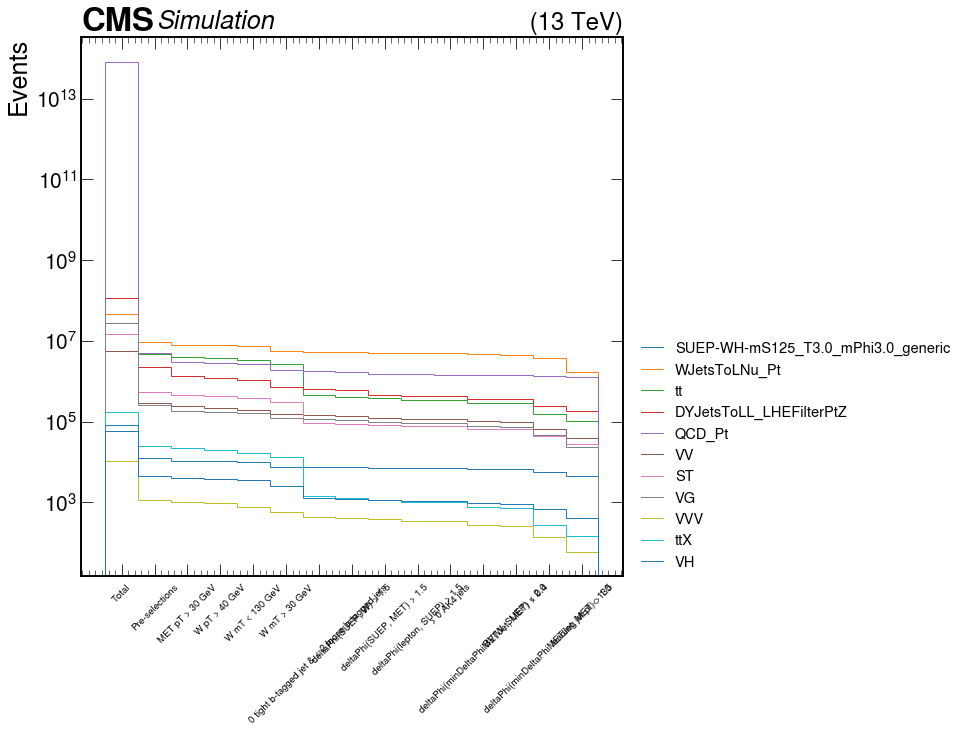

In [7]:
samples= ['SUEP-WH-mS125_T3.0_mPhi3.0_generic'] + bkgs[::-1]
selections = [
    'total', 
    #'genCuts', 
    #'allTriggers',  
    #'qualityFilters', 
    #'orthogonality', 
    #'oneLepton', 
    #'oneCluster', 
    'twoTracksInCluster',
    'MET_pt_>_30.0_SR',
    'W_pt_from_MET_>_40.0_SR',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_SR",
    'bjetSel_==_1.0_SR',
    'deltaPhi_SUEP_W_>_1.5_SR', 'deltaPhi_SUEP_MET_>_1.5_SR', 'deltaPhi_lepton_SUEP_>_1.5_SR',
    'ngood_ak4jets_>=_1.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_SR',
    'W_SUEP_BV_<_2.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_SR',
    #'maxDeltaPhiJets_<=_1.0_SR2',
    #"maxDeltaEtaJets_<=_0.8_SR3",
    #"SUEP_S1_HighestPT_>_0.3_SR4",
    "jet1_pt_<_130.0_SR5"

]
selection_labels = [
    'Total',
    #'Gen cuts', 
    #'Triggers', 
    #'Quality filters', 
    #'ZH & ggF orthogonality', 
    #'One tight lepton', 
    #'One AK15 cluster', 
    #'Two tracks in AK15 cluster',
    'Pre-selections',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 1.5',
    #'maxDeltaPhiJets <= 1',
    #"maxDeltaEtaJets <= 0.8",
    #"S1 > 0.3",
    "leading jet pt < 130"
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

In [2]:
stackedSamples = bkgs
samples = [
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic',
    #'WJetsToLNu_Pt'
    
]

figs = make_n1_plots(plots, cutflows, "SR", density=False, samples=samples, stackedSamples=stackedSamples)

NameError: name 'bkgs' is not defined

### Fraction of SR per sample

Show the fraction of each sample out of the total backround as a function of the SUEP candidate # const.

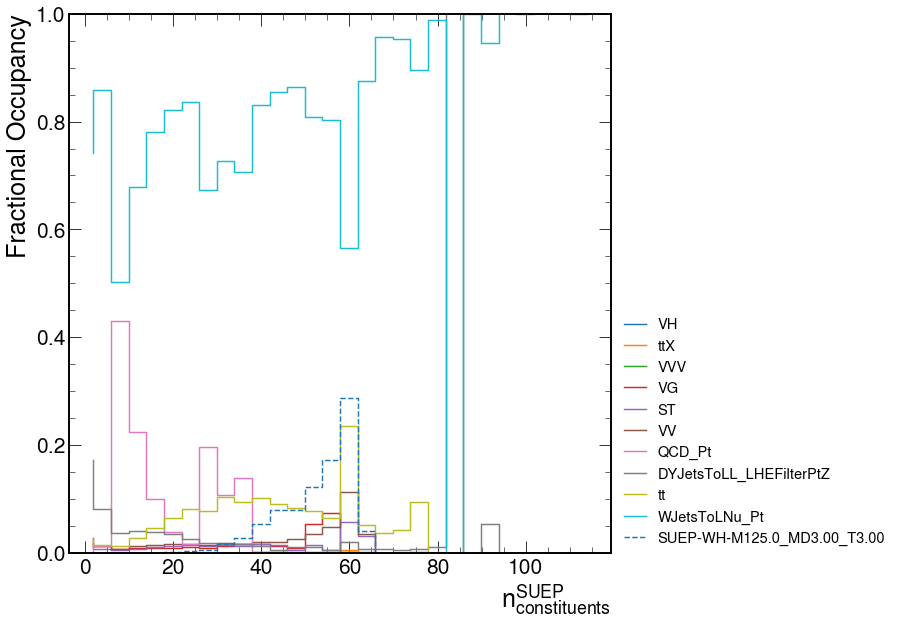

In [12]:
fractions = {}
signals = ['SUEP-WH-M125.0_MD3.00_T3.00']
bkgs_noQCD = bkgs

for s in bkgs_noQCD+signals:
    fractions[s] = plots[s]['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values() / plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values()

fig, ax = plt.subplots()
for s in fractions.keys():
    if s in bkgs_noQCD: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s)
    else: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s, linestyle='--')

ax.legend(loc=(1.01, 0), fontsize='xx-small')
ax.set_ylim(0,1)
ax.set_ylabel("Fractional Occupancy")
ax.set_xlabel("$n^{\mathrm{SUEP}}_{\mathrm{constituents}}$")
fig.show()

## CRTT

### Distributions

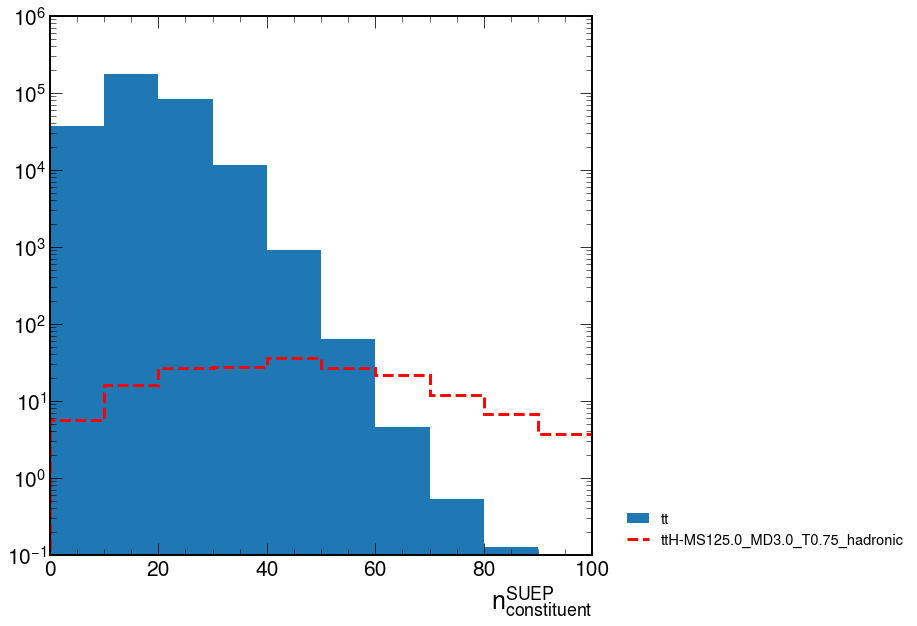

In [13]:
plot_labels = [
    'SUEP_nconst_CRTT',
]
samples = [
    'ttH-MS125.0_MD3.0_T0.75_hadronic'
]
stacked_samples = ['tt']
density = False
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, label=samples, linestyle='dashed', linewidth=3, color=getColors(samples), ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.ylim(1e-1, 1e6)
    plt.xlim(0, 100)

    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

### CRTT vs SR

Compare the shapes of the key variables for the tt background between CRTT and SR.

The shapes should be simliar for the CR to be a reliable estimate of the SR.

(0.5, 2.0)

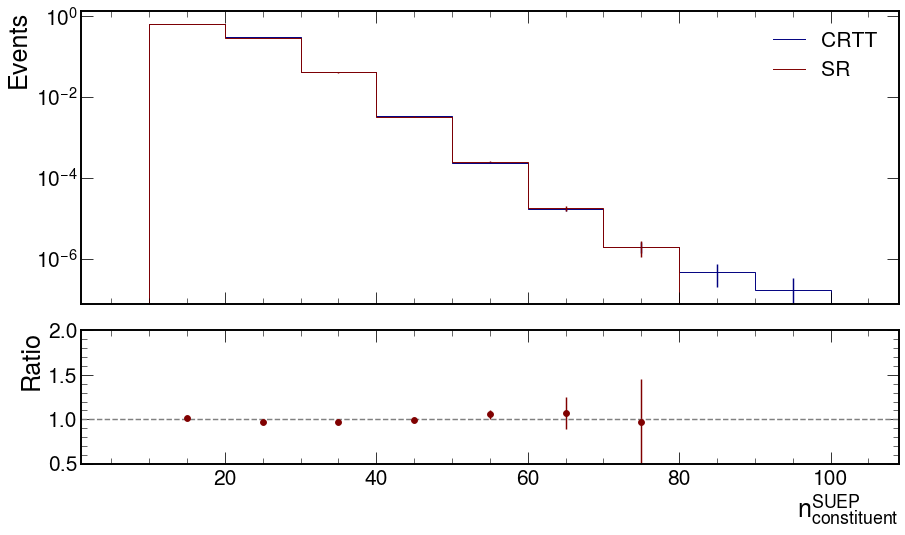

In [14]:
hCRTT = plots['tt']['SUEP_nconst_CRTT'].copy()
hSR = plots['tt']['SUEP_nconst_SR'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hCRTT = rebin_piecewise(hCRTT, new_bins)
hSR = rebin_piecewise(hSR, new_bins)

hCRTT = hCRTT[10j:]
hSR = hSR[10j:]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2)

(0.5, 2.0)

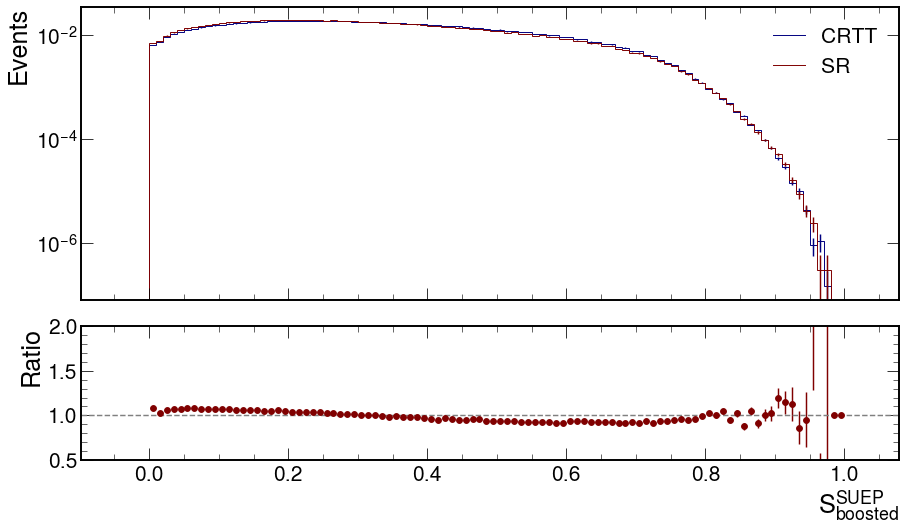

In [15]:
hCRTT = plots['tt']['SUEP_S1_CRTT'].copy()
hSR = plots['tt']['SUEP_S1_SR'].copy()

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

(0.5, 2.0)

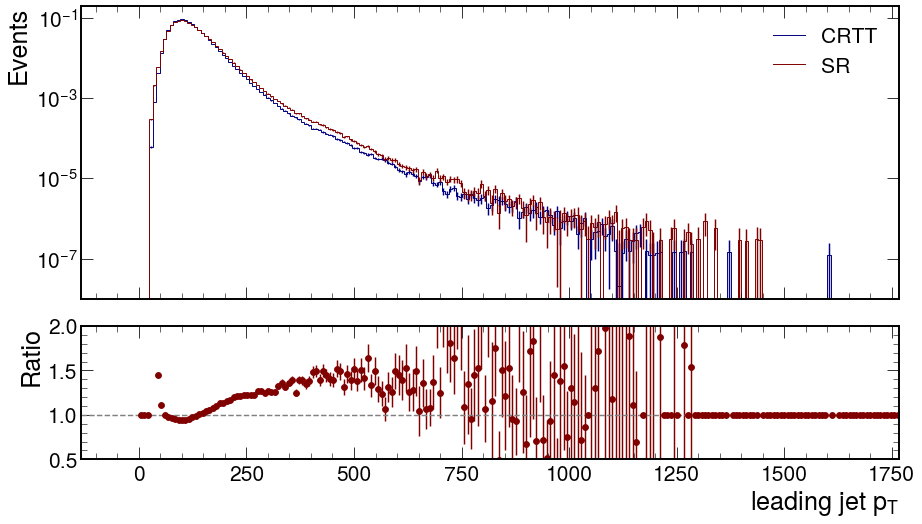

In [16]:
hCRTT = plots['tt']['jet1_pT_CRTT'].copy()[::4j]
hSR = plots['tt']['jet1_pT_SR'].copy()[::4j]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

### Closure

Check ABCD method closure in CRTT

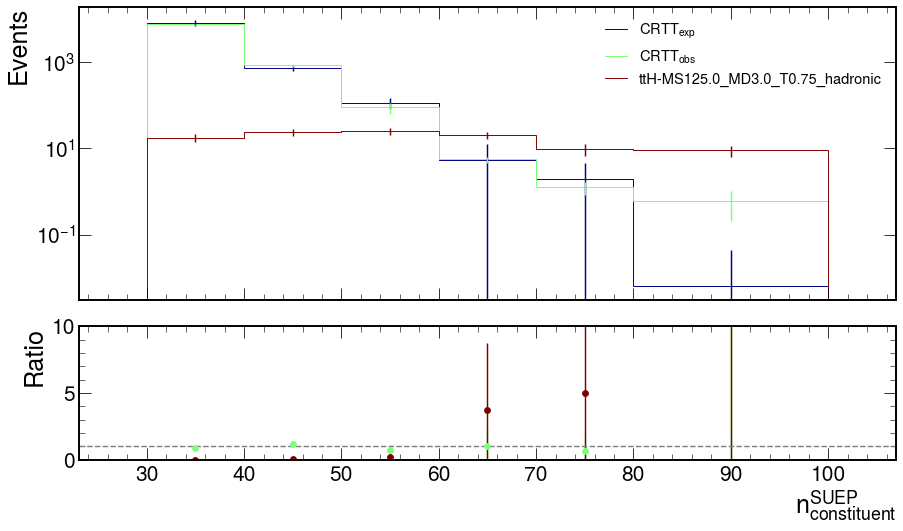

In [17]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)
hTTH = plots['ttH-MS125.0_MD3.0_T0.75_hadronic']['2D_SUEP_S1_vs_SUEP_nconst_CRTT'][0.5j::sum,30j:]
hTTH = rebin_piecewise(hTTH, [30, 40, 50, 60, 70, 80, 100])

fig, axs = plot_ratio([SR_exp, SR, hTTH], labels=["$CRTT_{exp}$", "$CRTT_{obs}$", 'ttH-MS125.0_MD3.0_T0.75_hadronic'])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

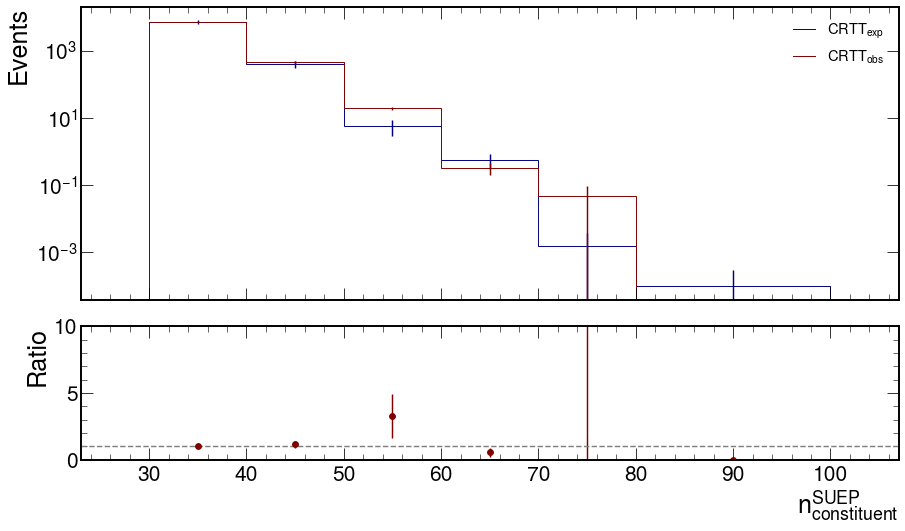

In [18]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[330j, 10000j], [130j, 230j], [30j, 130j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

### Cutflows

Yields
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                    Selection                    | SUEP-WH-M125.0_MD3.00_T3.00 | ttH-MS125.0_MD3.0_T0.75_hadronic |     tt     |
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                      Total                      |            25807            |              29831               | 2.7135e+07 |
|                     Gen cuts                    |            25807            |              29831               | 2.7135e+07 |
|                     Triggers                    |            9153.2           |              7336.5              | 1.1332e+07 |
|                 Quality filters                 |             9152            |              7332.1              | 1.1325e+07 |
|              ZH & ggF orthogonality             |            8482.3           |  

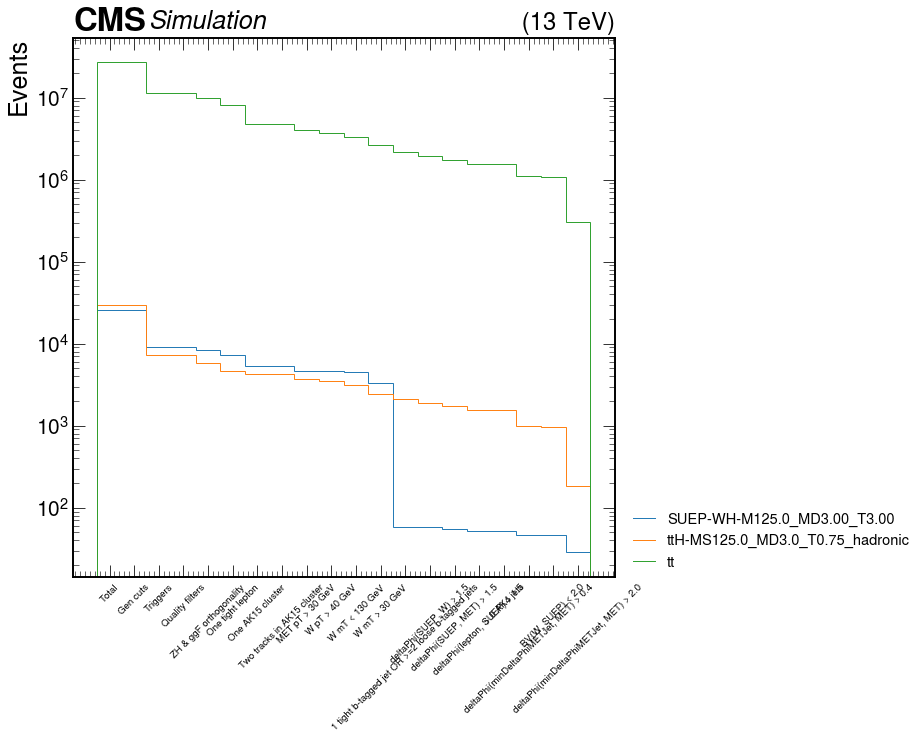

In [21]:
samples= [
    'SUEP-WH-M125.0_MD3.00_T3.00',
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
] + ['tt']
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_CRTT',
    'W_pT_from_MET_>_40.0_CRTT',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_CRTT",
    'bjetSel_==_0.0_CRTT',
    'deltaPhi_SUEP_W_>_1.5_CRTT', 'deltaPhi_SUEP_MET_>_1.5_CRTT', 'deltaPhi_lepton_SUEP_>_1.5_CRTT',
    #'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'ngood_ak4jets_>_0.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'W_SUEP_BV_<_2.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_CRTT',
    #'nphotons_==_0.0_HighestPT',
    #'ngood_ak4jets_<_4.0_HighestPT',
    #'nak4jets_outsideSUEP_<_2.0_HighestPT'
]
selection_labels = [
    'Total',
    'Gen cuts', 'Triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '1 tight b-tagged jet OR >=2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 2.0',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

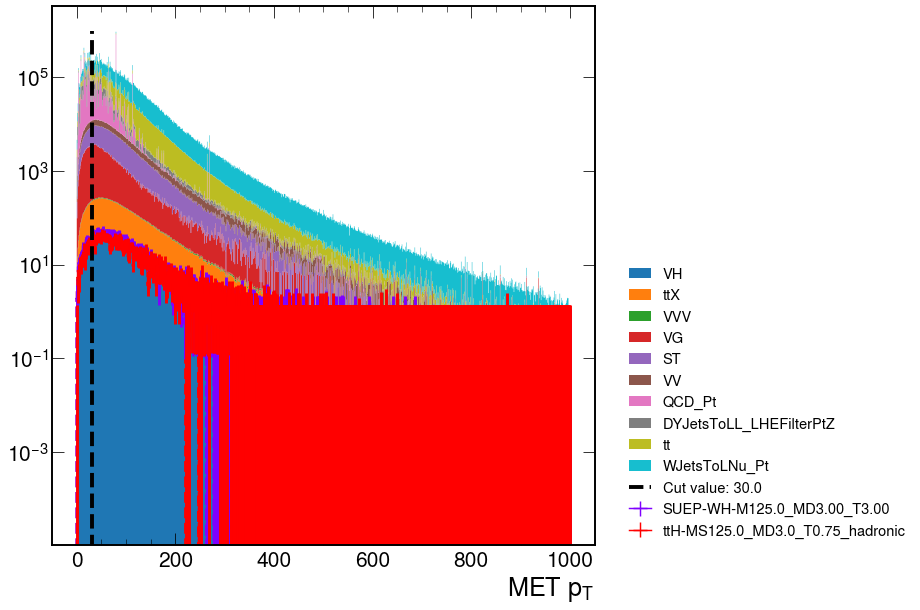

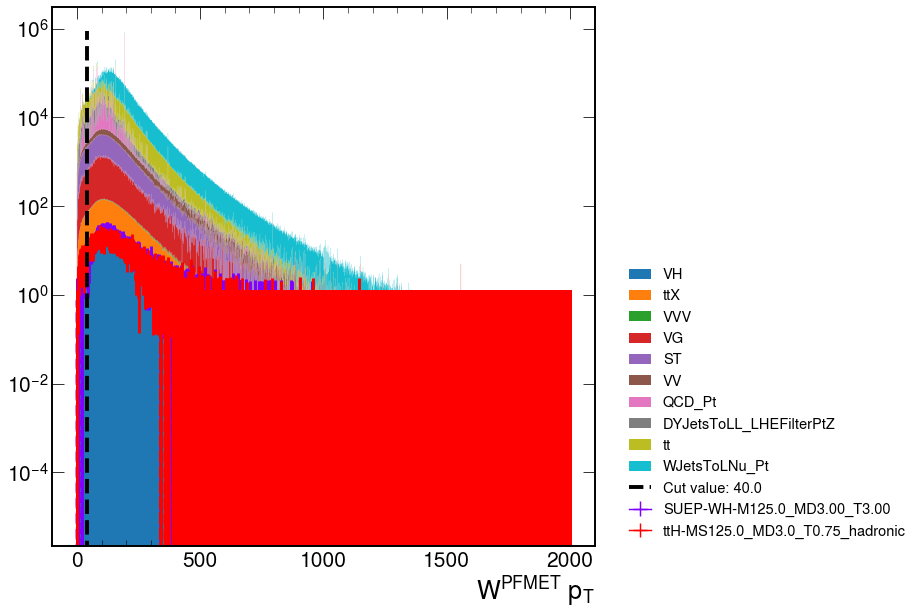

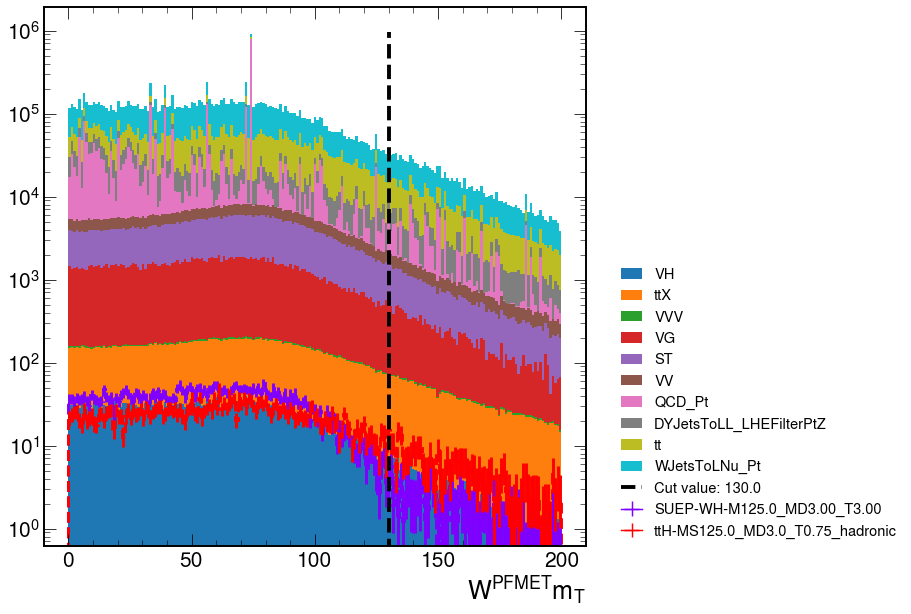

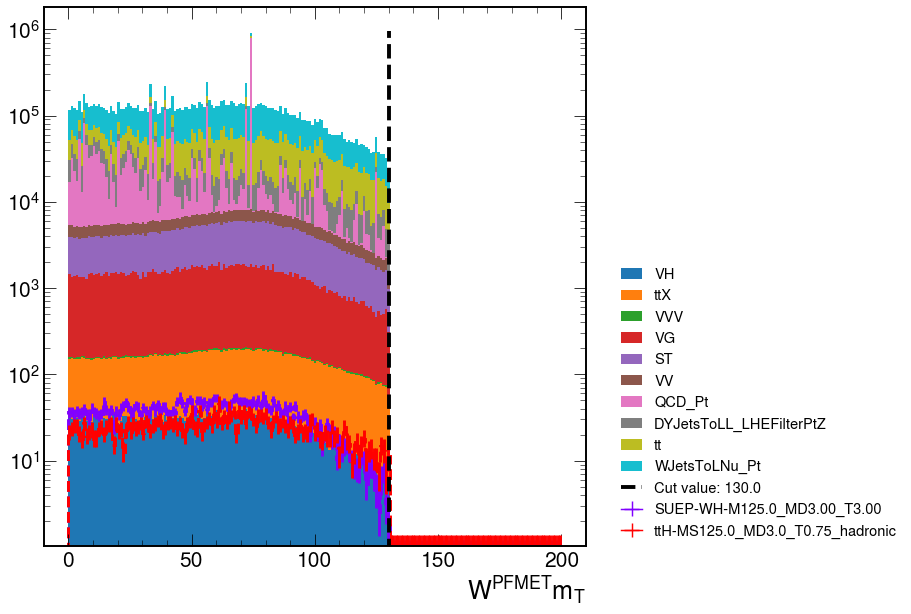

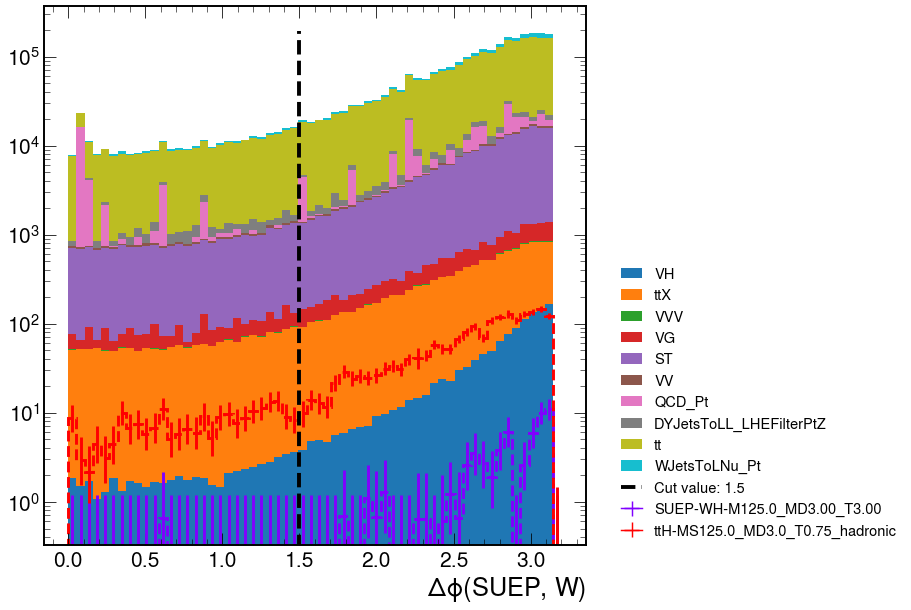

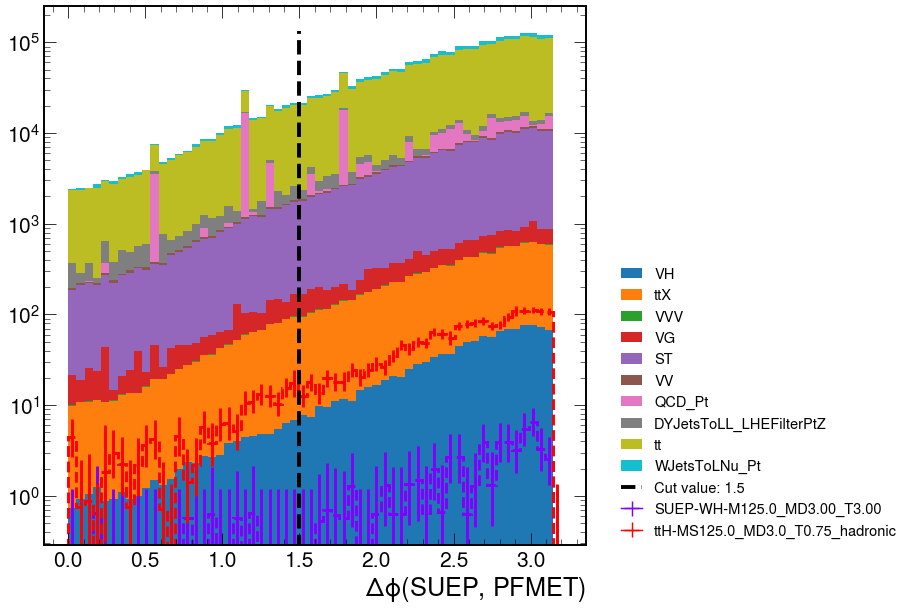

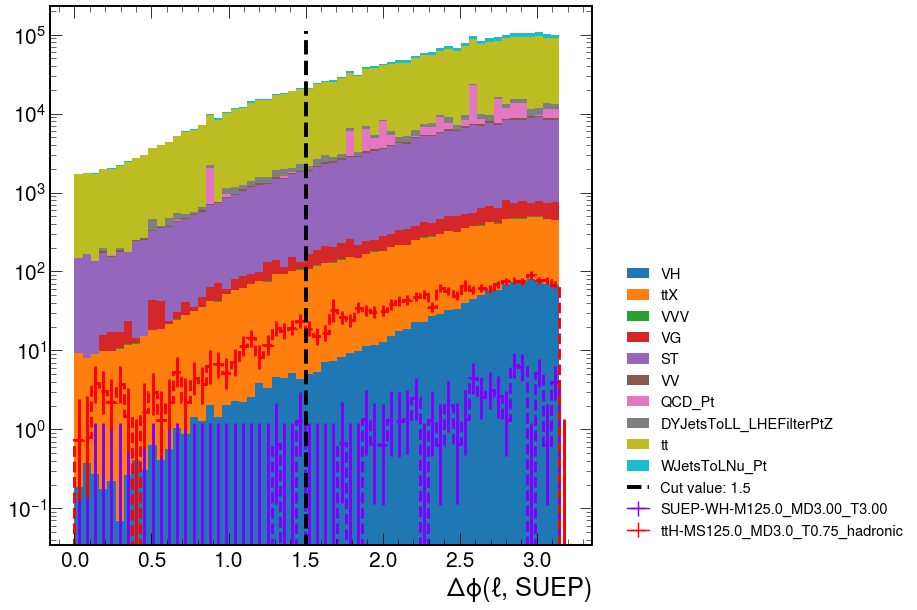

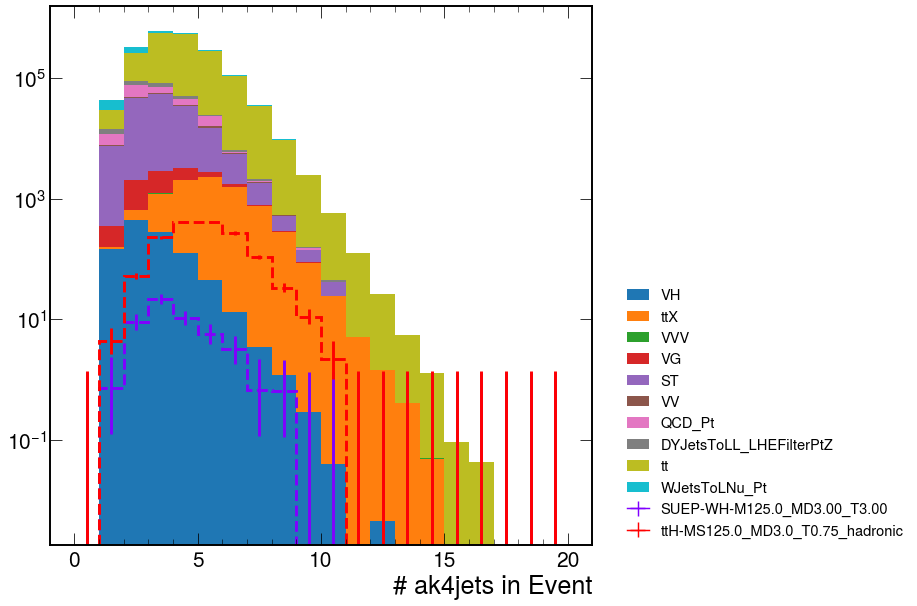

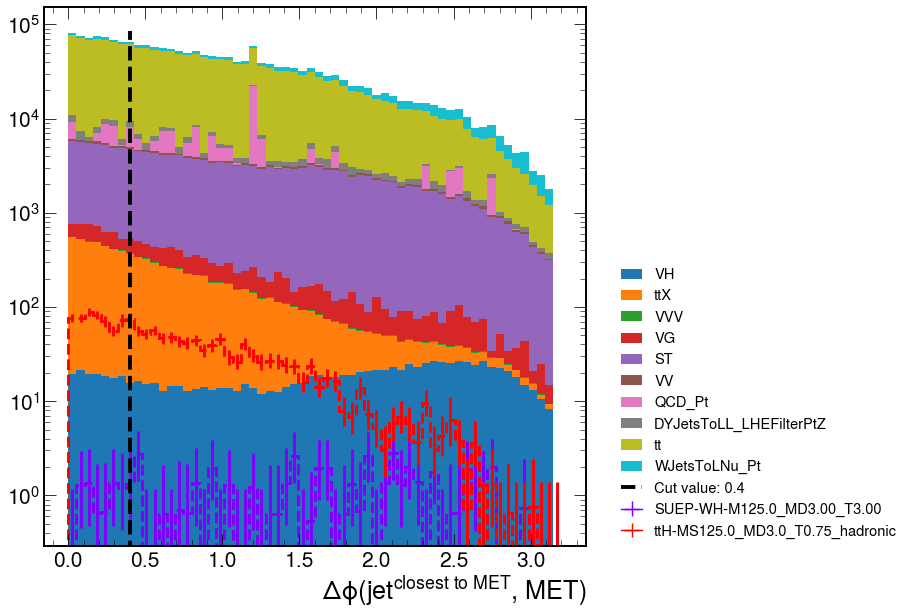

In [22]:
stackedSamples = bkgs
samples = [
    "SUEP-WH-M125.0_MD3.00_T3.00",
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
]

figs = make_n1_plots(plots, cutflows, "CRTT", samples=samples, stackedSamples=stackedSamples)


### ttH & WH Contamination

Find the samples with highest yields in CRTT in high # constituents region.

ttH-MS125.0_MD3.0_T0.75_hadronic:
  45.64% of total
ttHToNonbb_M125:
  0.32% of total
ttHTobb_M125:
  0.15% of total
WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD:
  11.41% of total
WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD:
  0.83% of total


(0.0, 5.0)

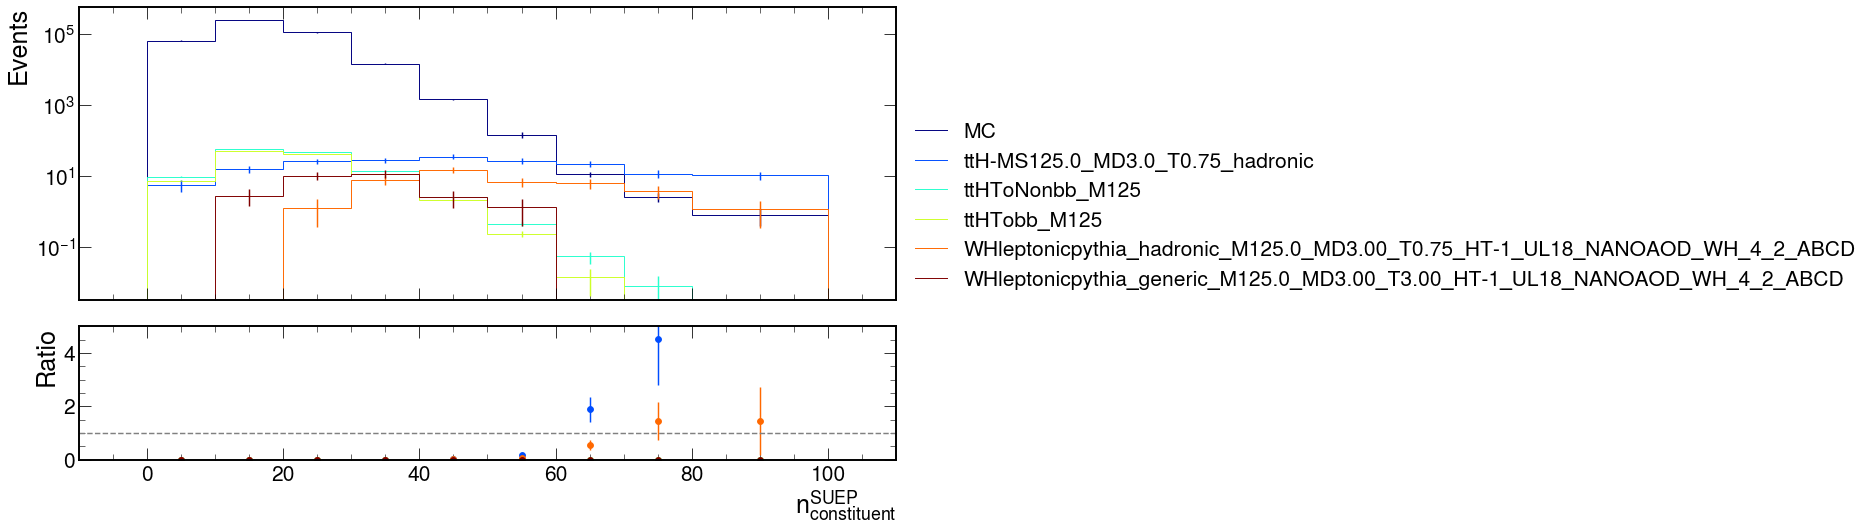

In [23]:
ttH_samples = np.array([s for s in plots.keys() if s.startswith('ttH')])
wh_samples = np.array([s for s in plots.keys() if s.startswith('WHleptonic')])

# integrate SUEP nconst > 30 to f
tth_yields = []
for ttH_sample in ttH_samples:
    nevents = plots[ttH_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    tth_yields.append(nevents)
wh_yields = []
for wh_sample in wh_samples:
    nevents = plots[wh_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    wh_yields.append(nevents)

# highest 5 contaminants
tth_yields = np.array(tth_yields)
wh_yields = np.array(wh_yields)
highest_tth_yields = tth_yields[np.argsort(tth_yields)[::-1]][:5]
highest_wh_yields = wh_yields[np.argsort(wh_yields)[::-1]][:5]
highest_tth_samples = ttH_samples[np.argsort(tth_yields)[::-1]][:5]
highest_wh_samples = wh_samples[np.argsort(wh_yields)[::-1]][:5]

nbkg = plots['MC']['SUEP_nconst_CRTT'][50j:].sum().value 
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")

# make a plot of the highest 5 contaminants
hlist, samples = [], []
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
hBkg = plots['MC']['SUEP_nconst_CRTT'].copy()
hBkg = rebin_piecewise(hBkg, new_bins)
hlist.append(hBkg)
samples.append('MC')
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    hTTH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hTTH = rebin_piecewise(hTTH, new_bins)
    hlist.append(hTTH)
    samples.append(sample)
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    hWH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hWH = rebin_piecewise(hWH, new_bins)
    hlist.append(hWH)
    samples.append(sample)

fig, axs = plot_ratio(hlist, samples)
axs[0].legend(loc=(1.01, 0))
axs[1].set_ylim(0, 5)

## CRWJ

### Closure

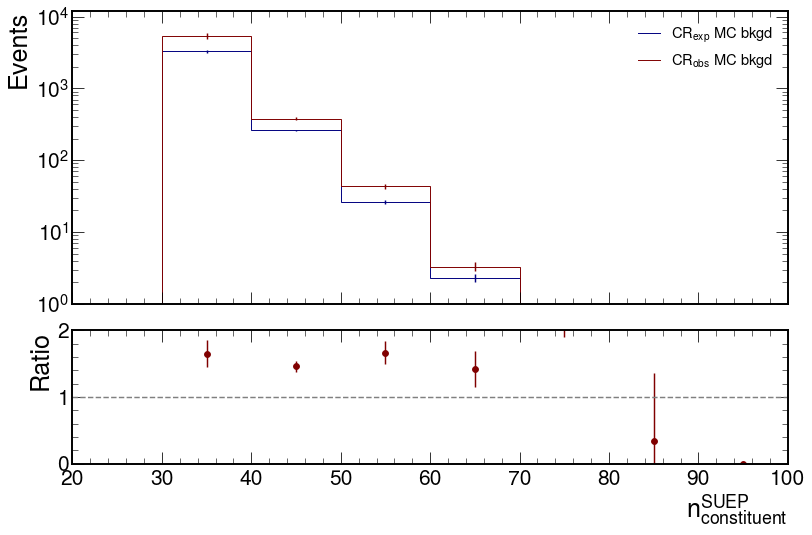

In [49]:
plot_label = '3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'
sample = 'MC'
abcd = plots[sample][plot_label][:, ::sum, :]
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True

'''
# 9 region
xregions = [[0.35j, 0.45j], [0.45j, 0.55j], [0.55j, 1.0j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)
'''


# 4 region
xregions = [0.5j, 0.7j, 1.0j]
yregions = [10j, 30j, 500j]

SR, SR_exp = ABCD_4regions(abcd, xregions, yregions, sum_var='x')


'''
# 6 region
xregions = [0.0j, 0.1j, 0.2j, 0.35j]
yregions = [10j, 30j, 500j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')
'''



#hSUEP = plots['SUEP-WH-mS125_T0.5_mPhi2.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
#hSUEP2 = plots['SUEP-WH-mS125_T2.0_mPhi2.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
#hSUEP3 = plots['SUEP-WH-mS125_T3.0_mPhi3.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
#hSUEP4 = plots['SUEP-WH-mS125_T8.0_mPhi8.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
#hSUEP = rebin_piecewise(hSUEP, [30, 40, 50, 60, 70, 80, 100])
#hSUEP2 = rebin_piecewise(hSUEP2, [30, 40, 50, 60, 70, 80, 100])
#hSUEP3 = rebin_piecewise(hSUEP3, [30, 40, 50, 60, 70, 80, 100])
#hSUEP4 = rebin_piecewise(hSUEP4, [30, 40, 50, 60, 70, 80, 100])

fig, axs = plot_ratio([SR_exp[::10j], SR[::10j]
                      #,hSUEP, hSUEP2, hSUEP3, hSUEP4]
                      ],
                      labels=["$CR_{exp}$ MC bkgd", "$CR_{obs}$ MC bkgd"
                      #,'SUEP-WH-mS125_T0.5_mPhi2.0_generic', 'SUEP-WH-mS125_T2.0_mPhi2.0_generic', 'SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T8.0_mPhi8.0_generic'
                      ])
_ = axs[1].set_ylim(0.0, 2.0)
axs[0].legend(fontsize='xx-small')
axs[0].set_ylim(1e0)
axs[0].set_xlim(20, 100)
plt.show()

In [32]:
plot_label = '3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'

xregions = [[0.0j, 0.1j], [0.1j, 0.2j], [0.2j, 0.35j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]

bkgd = plots['MC'][plot_label][0.2j:0.35j, ::sum, 30j::sum].sum().value
wjinc = plots2['WJetsToLNu_Pt'][plot_label][0.2j:0.35j, ::sum, 30j::sum].sum().value

print(wjinc/bkgd)

0.04335088276531933


In [20]:
for key in plots.keys():
    print(key)

DYJetsToLL_LHEFilterPtZ
DYJetsToLL_M
QCD_Pt
ST
tt
ttX
VG
WJetsToLNu_Pt
VV
VVV
VH
SUEP-WH-mS125_T0.5_mPhi2.0_generic
SUEP-WH-mS125_T1.0_mPhi2.0_generic
SUEP-WH-mS125_T2.0_mPhi2.0_generic
SUEP-WH-mS125_T4.0_mPhi2.0_generic
SUEP-WH-mS125_T8.0_mPhi2.0_generic
SUEP-WH-mS125_T0.75_mPhi3.0_generic
SUEP-WH-mS125_T1.5_mPhi3.0_generic
SUEP-WH-mS125_T12.0_mPhi3.0_generic
SUEP-WH-mS125_T3.0_mPhi3.0_generic
SUEP-WH-mS125_T6.0_mPhi3.0_generic
SUEP-WH-mS125_T1.0_mPhi4.0_generic
SUEP-WH-mS125_T16.0_mPhi4.0_generic
SUEP-WH-mS125_T2.0_mPhi4.0_generic
SUEP-WH-mS125_T4.0_mPhi4.0_generic
SUEP-WH-mS125_T8.0_mPhi4.0_generic
SUEP-WH-mS125_T16.0_mPhi8.0_generic
SUEP-WH-mS125_T2.0_mPhi8.0_generic
SUEP-WH-mS125_T32.0_mPhi8.0_generic
SUEP-WH-mS125_T4.0_mPhi8.0_generic
SUEP-WH-mS125_T8.0_mPhi8.0_generic
MC


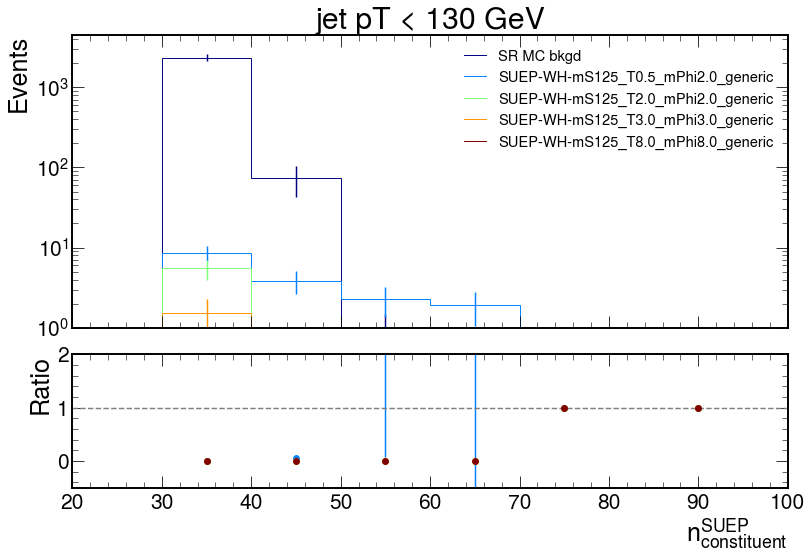

In [36]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRWJ5'
plot_label = '2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
xregions = [[230.0j, 1000.0j], [130.0j, 230.0j], [30.0j, 130.0j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)
hSUEP = plots['SUEP-WH-mS125_T0.5_mPhi2.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
hSUEP2 = plots['SUEP-WH-mS125_T2.0_mPhi2.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
hSUEP3 = plots['SUEP-WH-mS125_T3.0_mPhi3.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
hSUEP4 = plots['SUEP-WH-mS125_T8.0_mPhi8.0_generic']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'][:130j:sum,30j:]
hSUEP = rebin_piecewise(hSUEP, [30, 40, 50, 60, 70, 80, 100])
hSUEP2 = rebin_piecewise(hSUEP2, [30, 40, 50, 60, 70, 80, 100])
hSUEP3 = rebin_piecewise(hSUEP3, [30, 40, 50, 60, 70, 80, 100])
hSUEP4 = rebin_piecewise(hSUEP4, [30, 40, 50, 60, 70, 80, 100])

fig, axs = plot_ratio([SR[:130j]
                      ,hSUEP, hSUEP2, hSUEP3, hSUEP4
                      ],
                      labels=["SR MC bkgd"
                      ,'SUEP-WH-mS125_T0.5_mPhi2.0_generic', 'SUEP-WH-mS125_T2.0_mPhi2.0_generic', 'SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T8.0_mPhi8.0_generic'
                      ])
_ = axs[1].set_ylim(-0.5, 2.0)
axs[0].legend(fontsize='xx-small')
axs[0].set_ylim(1e0)
axs[0].set_xlim(20, 100)
axs[0].set_title('jet pT < 130 GeV')
plt.show()

### CRWJ vs SR

Text(0.5, 1.0, 'jet pT < 130 GeV')

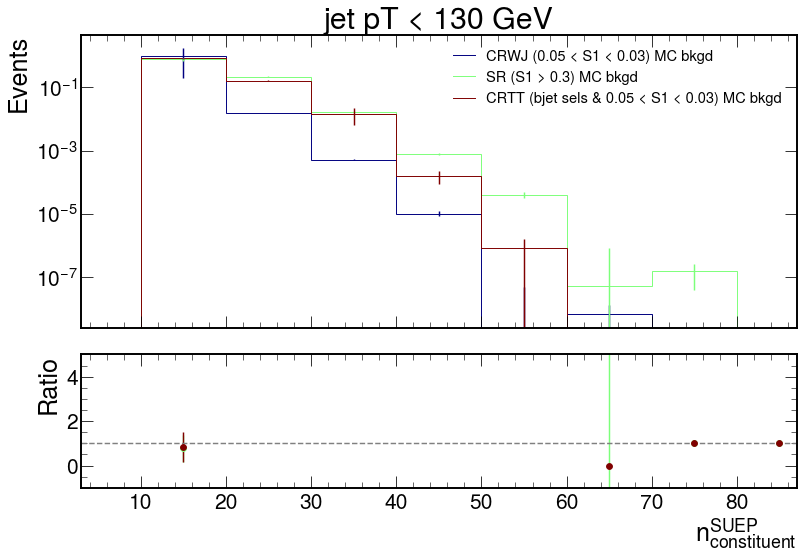

In [6]:
hCRWJ = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'].copy()
hSR = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR4'].copy()
hCRTT = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRTT4'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hCRTT = hCRTT[:130j:sum, :]
hSR = hSR[:130j:sum, :]
hCRWJ = hCRWJ[:130j:sum, :]

hCRTT = rebin_piecewise(hCRTT, new_bins)
hSR = rebin_piecewise(hSR, new_bins)
hCRWJ = rebin_piecewise(hCRWJ, new_bins)

hCRWJ = hCRWJ[10j:]
hSR = hSR[10j:]
hCRTT = hCRTT[10j:]

fig, axs = plot_ratio([hCRWJ, hSR, hCRTT], ['CRWJ (0.05 < S1 < 0.03) MC bkgd', 'SR (S1 > 0.3) MC bkgd', 'CRTT (bjet sels & 0.05 < S1 < 0.03) MC bkgd'], density=True)
axs[1].set_ylim(-1, 5)
axs[0].set_title("jet pT < 130 GeV")

(0.0, 2.0)

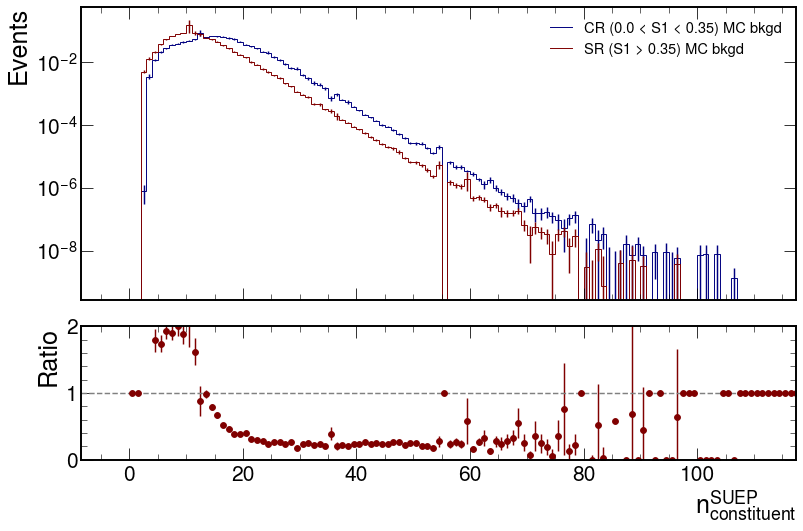

In [7]:
h = plots['MC']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hCR = h[:0.35j:sum, ::sum, :]
hSR = h[0.35j::sum, ::sum, :]

#hCRTT = rebin_piecewise(hCRTT, new_bins)

#hCRTT = hCRTT[10j:]

fig, axs = plot_ratio([hSR, hCR], ['CR (0.0 < S1 < 0.35) MC bkgd', 'SR (S1 > 0.35) MC bkgd'], density=True)
axs[1].set_ylim(0, 2)
#axs[0].set_title("jet pT < 130 GeV")

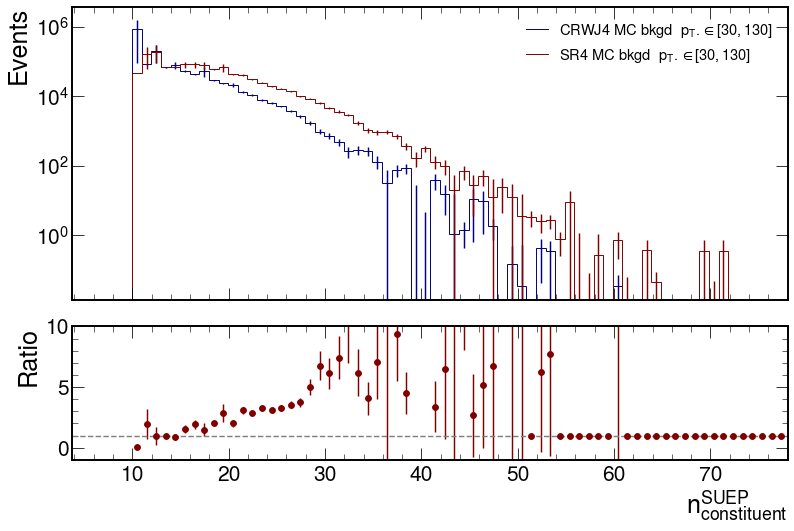

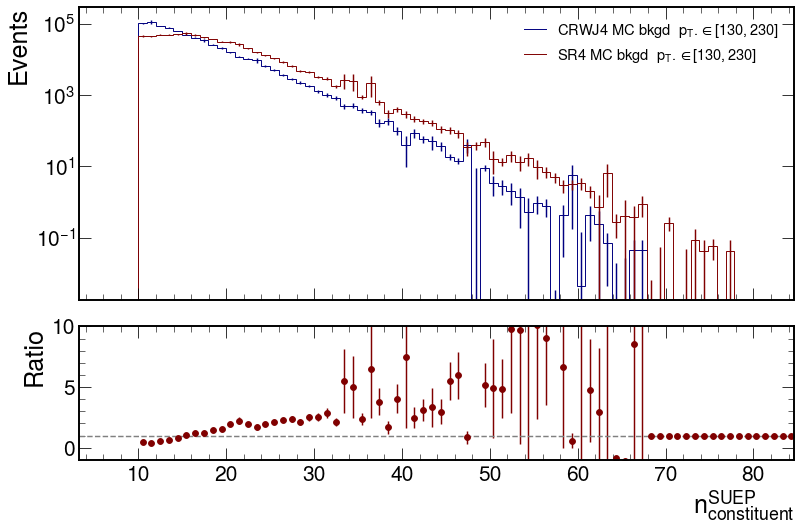

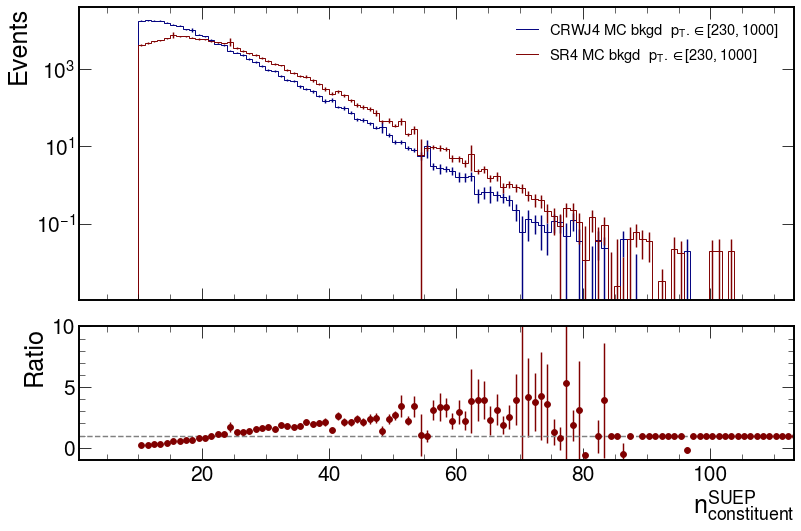

In [6]:
hCRWJ = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'].copy()
hSR = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR4'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#hCRTT = rebin_piecewise(hCRTT, new_bins)
#hSR = rebin_piecewise(hSR, new_bins)

hCRWJ = hCRWJ[30j:130j:sum, 10j:]
hSR = hSR[30j:130j:sum, 10j:]

fig, axs = plot_ratio([hCRWJ, hSR], ['CRWJ4 MC bkgd $\ p_T. \in [30,130]$', 'SR4 MC bkgd $\ p_T. \in [30,130]$'], density=False)
axs[1].set_ylim(-1, 10)
plt.show()

hCRWJ = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'].copy()
hSR = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR4'].copy()
hCRWJ = hCRWJ[130j:230j:sum, 10j:]
hSR = hSR[130j:230j:sum, 10j:]

fig, axs = plot_ratio([hCRWJ, hSR], ['CRWJ4 MC bkgd $\ p_T. \in [130,230]$', 'SR4 MC bkgd $\ p_T. \in [130,230]$'], density=False)
axs[1].set_ylim(-1, 10)
plt.show()

hCRWJ = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_CRWJ4'].copy()
hSR = plots['MC']['2D_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR4'].copy()
hCRWJ = hCRWJ[230j:1000j:sum, 10j:]
hSR = hSR[230j:1000j:sum, 10j:]

fig, axs = plot_ratio([hCRWJ, hSR], ['CRWJ4 MC bkgd $\ p_T. \in [230,1000]$', 'SR4 MC bkgd $\ p_T. \in [230,1000]$'], density=False)
axs[1].set_ylim(-1, 10)
plt.show()

Text(0.5, 1.0, 'SR')

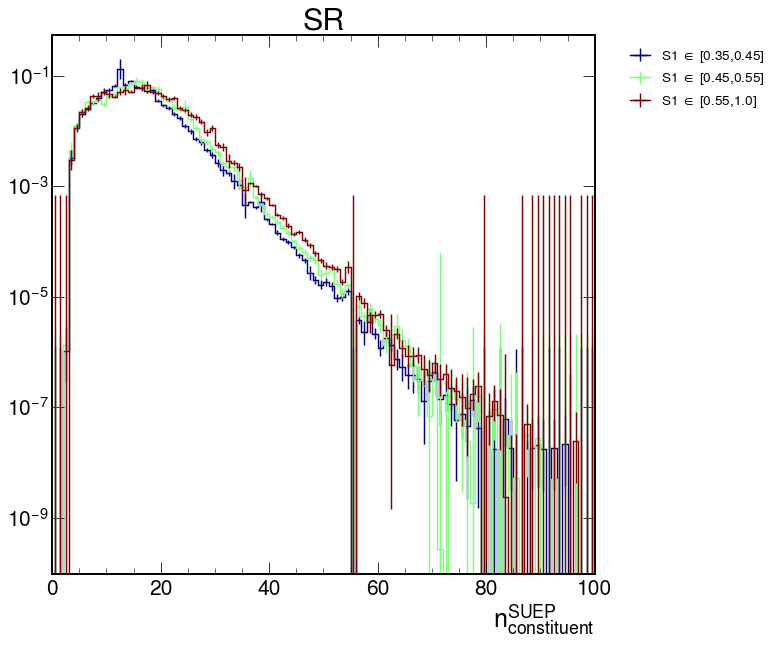

In [19]:
sample = 'MC'
slice_var = 'x'
plot_label = '3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR'
stack = False
density = True
regions_list = [[0.0j, 200.0j],[200.0j, 400.0j],[400.0j, 600.0j],[600.0j, 800.0j]]
regions_list = [[0.35j, 0.45j], [0.45j, 0.55j], [0.55j, 1.0j]]
#regions_list = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]


labels = [r"S1 $\in$ [{},{}]".format(round(regions[0].imag, 2), round(regions[1].imag, 2)) for regions in regions_list]
h = plots[sample][plot_label][:, ::sum, :]
fig, ax = plot_sliced_hist2d(h, regions_list, density=density, stack=stack, slice_var=slice_var, labels=labels)
plt.xlim(0, 100)
plt.title("SR")


### Fraction of CRWJ per sample

ValueError: x and y must have same first dimension, but have shapes (25,) and (125,)

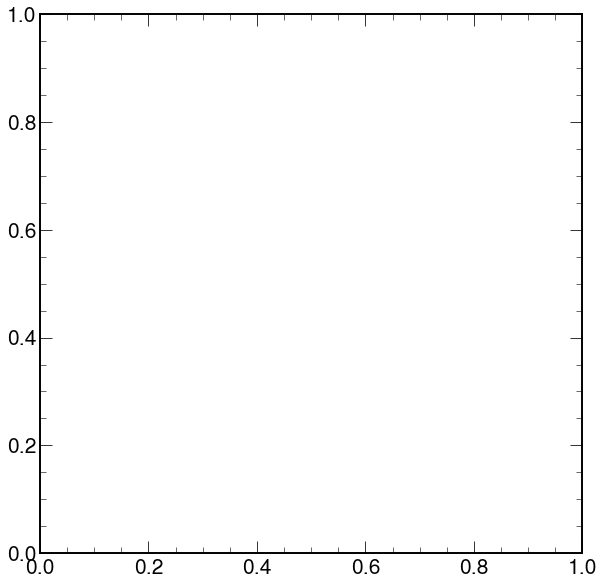

In [6]:
fractions = {}
fraction_errs = {}
signals = ['SUEP-WH-mS125_T3.0_mPhi3.0_generic']
bkgs_noQCD = bkgs[::-1]

def fraction_err(s,B):
    B_values = B.values()
    s_values = s.values()
    s_sigma = np.sqrt(s.variances())
    bkgds = ["VH","ttX","VVV","VG","ST","VV","QCD_Pt","DYJetsToLL_LHEFilterPtZ","tt","WJetsToLNu_Pt"]

    var = 0
    for bkgd in bkgds:
        b_sigma = np.sqrt(plots[bkgd]['2D_SUEP_S1_vs_SUEP_nconst_CRWJ1'][::sum, ::4j].variances())
        var += ( (s_values ** 2) / (B_values ** 4) ) * (b_sigma ** 2)
    var +=  ( ((B_values - s_values) ** 2) / (B_values ** 4) ) * (s_sigma** 2)
    
    return np.sqrt(var)
    

for s in bkgs_noQCD+signals:
    fractions[s] = plots[s]['2D_SUEP_S1_vs_SUEP_nconst_CRWJ1'][::sum, ::4j].values() / plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_CRWJ1'][::sum, ::4j].values()
    fraction_errs[s] = fraction_err(plots[s]['2D_SUEP_S1_vs_SUEP_nconst_CRWJ1'][::sum, ::4j], plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_CRWJ1'][::sum, ::4j])

cmap = plt.cm.tab10(np.linspace(0, 1, len(fractions)))
#cmap = cmap[::-1]

fig, ax = plt.subplots()
i=0
for s in fractions.keys():
    if s in bkgs_noQCD: 
        ax.step(plots['MC']['SUEP_nconst_CRWJ1'][::4j].axes[0].centers, fractions[s], where='mid', label=s, color=cmap[i])
        ax.errorbar(plots['MC']['SUEP_nconst_CRWJ1'][::4j].axes[0].centers, fractions[s], linestyle='', yerr=fraction_errs[s], color=cmap[i])
        i += 1
    else: ax.step(plots['MC']['SUEP_nconst_CRWJ1'][::4j].axes[0].centers, fractions[s], label=s, linestyle='--')

ax.legend(loc=(1.01, 0), fontsize='xx-small')
ax.set_ylim(0,1)
ax.set_ylabel("Fractional Occupancy")
ax.set_xlabel("$n^{\mathrm{SUEP}}_{\mathrm{constituents}}$")
fig.show()

### Cutflows

Yields
+------------------------------------------------+------------------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                   Selection                    | SUEP-WH-mS125_T3.0_mPhi3.0_generic | WJetsToLNu_Pt |     tt     | DYJetsToLL_LHEFilterPtZ |   QCD_Pt   |     VV     |     ST     |     VG     |  VVV   |  ttX   |   VH   |
+------------------------------------------------+------------------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                     Total                      |               59817                |   4.5767e+07  | 2.7135e+07 |        1.1867e+08       | 8.1894e+13 | 5.5317e+06 | 1.5153e+07 | 2.7679e+07 | 10712  | 169270 | 83457  |
|                 Pre-selections                 |               12196                |   9.5902e+06  | 4

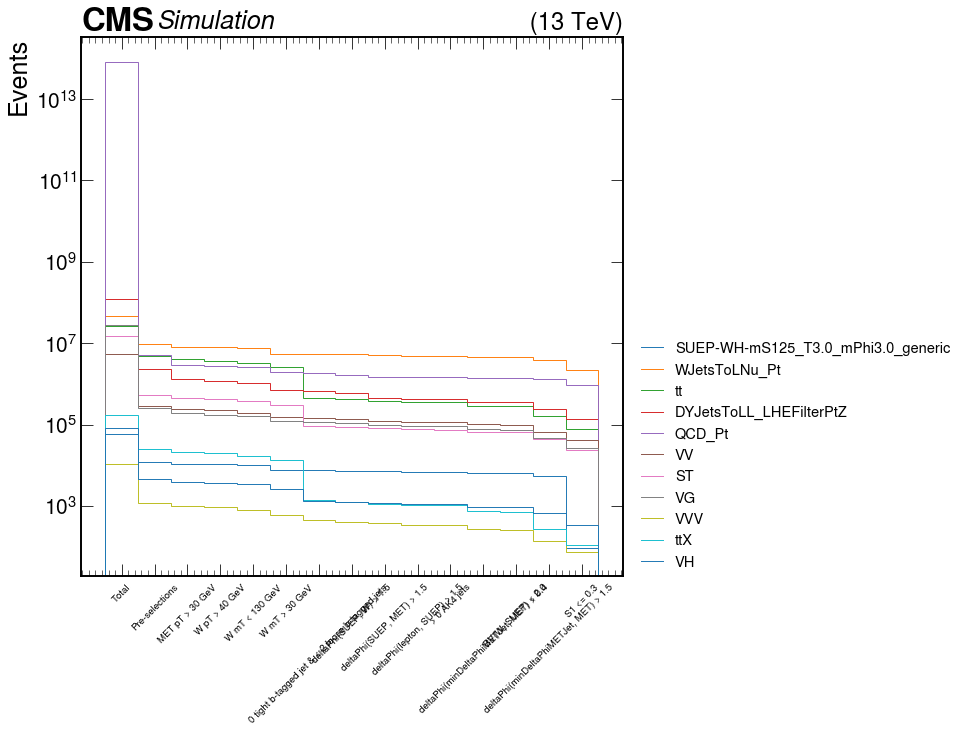

In [10]:
samples= ['SUEP-WH-mS125_T3.0_mPhi3.0_generic'] + bkgs[::-1]
selections = [
    'total', 
    #'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 
    'twoTracksInCluster',
    'MET_pt_>_30.0_CRWJ2',
    'W_pt_from_MET_>_40.0_CRWJ2',
    #'W_mT_from_MET_>=_130.0_CRWJ2',
    "W_mT_from_MET_<_130.0_CRWJ2", "W_mT_from_MET_>_30.0_CRWJ2",
    'bjetSel_==_1.0_CRWJ2',
    'deltaPhi_SUEP_W_>_1.5_CRWJ2', 'deltaPhi_SUEP_MET_>_1.5_CRWJ2', 'deltaPhi_lepton_SUEP_>_1.5_CRWJ2',
    'ngood_ak4jets_>=_1.0_CRWJ2',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRWJ2',
    'W_SUEP_BV_<_2.0_CRWJ2',
    "deltaPhi_minDeltaPhiMETJet_MET_>_1.5_CRWJ2",
    #'maxDeltaPhiJets_>_1.0_CRWJ2',
    #"maxDeltaEtaJets_>_0.8_CRWJ3",
    "SUEP_S1_HighestPT_<=_0.3_CRWJ4",
    #"jet1_pt_>=_130.0_CRWJ5"
]
selection_labels = [
    'Total',
    #'Gen cuts', 'All triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One cluster', 'Two tracks in cluster',
    'Pre-selections',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    #'W mT >= 130 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 1.5',
    #'maxDeltaPhiJets > 1',
    #"maxDeltaEtaJets > 0.8",
    "S1 <= 0.3",
    #"leading jet pt >= 130"
]
#print(cutflows['SUEP-WH-mS125_T2.0_mPhi2.0_generic'].keys())
table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### Distributions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


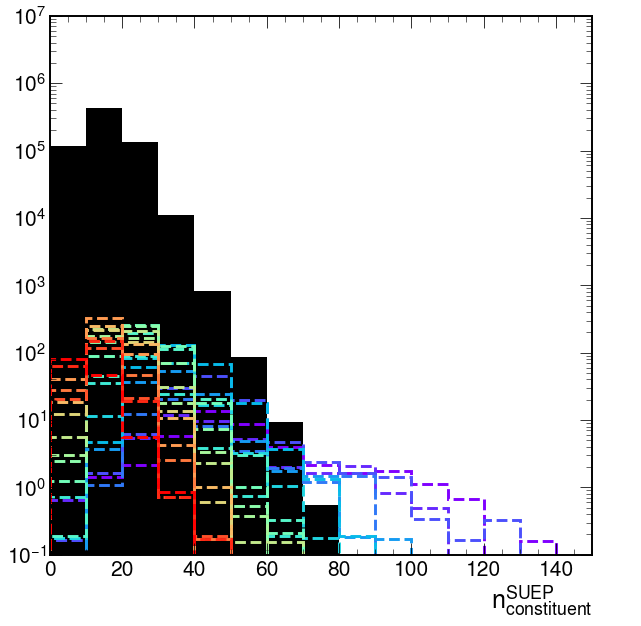

In [6]:
plot_labels = [
    #'SUEP_nconst_CRWJ_1',
    #'SUEP_nconst_SR',
    #'jet1_pt_SR',
    #'SUEP_S1_SR',
    '3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR',
    #'3D_SUEP_S1_vs_ak4SUEP1_SUEP_BV_vs_SUEP_nconst_SR',
    #'ak4SUEP1_SUEP_BV_SR',
    #'ak4SUEP1_SUEP_BV_sum_norm_SR',
    #'ak4SUEP1_SUEP_BV_sum_norm_CRWJ_1',
    #'ak4SUEP1_SUEP_BV_sum_norm_CRTT',
    #'SUEP_pt_SR',
    #'maxDeltaPhiJets_SR',
    #'maxDeltaEtaJets_SR',
    #'nak4jets_outsideSUEP_SR'
    #'W_pt_from_MET_SR',
    #'W_pt_from_MET_SR2',
    #W_pt_from_MET_CRWJ2',

]
samples = [
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    'SUEP-WH-mS125_T2.0_mPhi2.0_generic',
    'SUEP-WH-mS125_T8.0_mPhi8.0_generic',
    'SUEP-WH-mS125_T0.5_mPhi2.0_generic',
    #"QCD_Pt",
    #"WJetsToLNu_Pt"
]
#print(plots.keys())
samples = [key for key in plots.keys() if 'SUEP' in key]

def extract_number(string):
    # Split the string at 'T' and '_'
    parts = string.split('_')
    for part in parts:
        if part.startswith('T'):
            return float(part[1:])
    return 0

# Sort the list using the extracted number as the key
samples = sorted(samples, key=extract_number, reverse=False)

stacked_samples = [
    #"VH",
    #"ttX",
    #"VVV",
    #"VG",
    #"ST",
    #"VV",
    #"QCD_Pt",
    #"DYJetsToLL_LHEFilterPtZ",
    #"tt",
    #"WJetsToLNu_Pt",
    "MC",
]
density = False
new_bins = None # [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(samples)))

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        #if 'ak4jet1_inSUEPcluster_pt' in plot_label: h = h[::10j]
        if '3D_SUEP_S1' in plot_label: h = h[0.45j:0.55j:sum, ::sum, ::10j]
        h_samples.append(h)
        #print(sample, 'efficiency: ', h[:1.0j].sum().value / h.sum().value)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        #if 'ak4jet1_inSUEPcluster_pt' in plot_label: h = h[::5j]
        if '3D_SUEP_S1' in plot_label: h = h[0.45j:0.55j:sum, ::sum, ::10j]
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, color = 'black', density=density,  stack=True, histtype='fill', ax=ax) #label=stacked_samples,
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, color=colors, linestyle='dashed', linewidth=3, ax=ax) #label=samples, 
    
    region = plot_label.split("_")[-1]
    #ax.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.xlim(0, 400)
    #plt.ylim(1e0, 1e4)
    if 'sum_norm' in plot_label:
        plt.xlim(-1, 1)
    #plt.ylim(bottom=1e-1)
    if "jet1_pt" in plot_label:
        plt.xlim(0,500)
    if "SUEP_nconst_SR":
        plt.xlim(0,150)
        plt.ylim(bottom=1e-1, top=1e7)
    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

In [8]:
plots['WJetsToLNu_Pt']['3D_SUEP_S1_vs_ak4SUEP1_SUEP_BV_vs_SUEP_nconst_SR']

KeyError: '3D_SUEP_S1_vs_ak4SUEP1_SUEP_BV_vs_SUEP_nconst_SR'

### Contamination

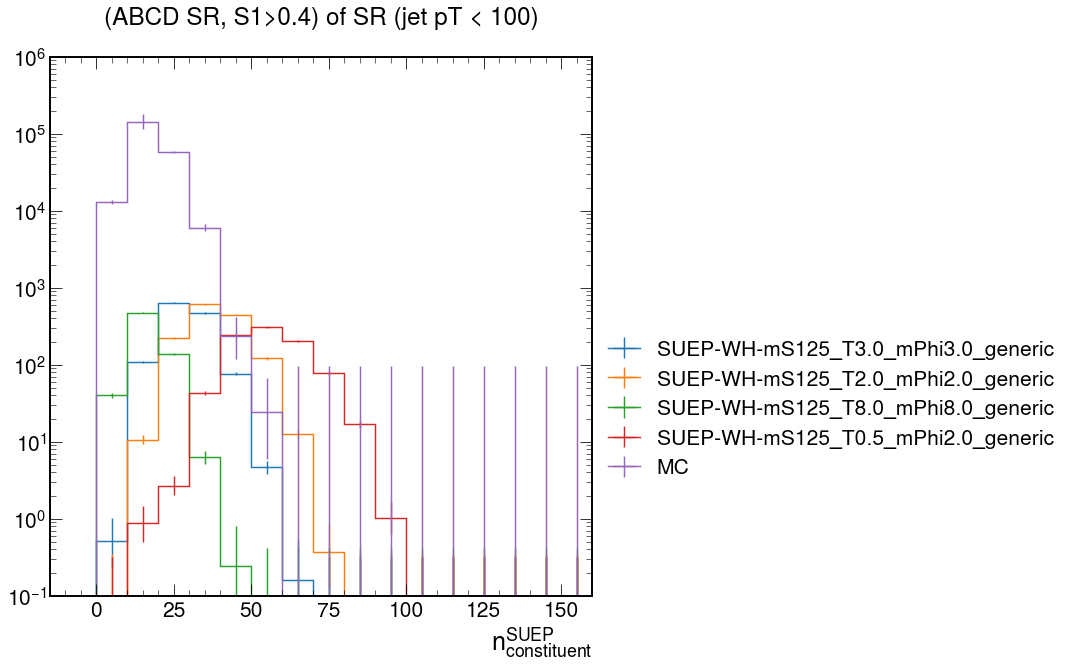

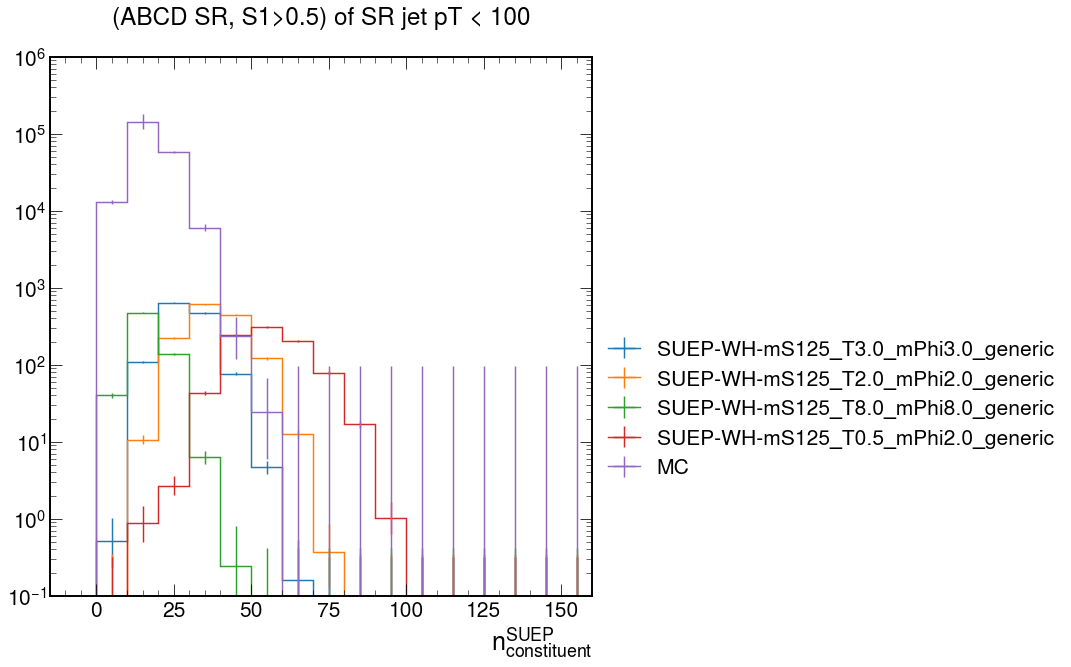

In [7]:
samples = ['SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T2.0_mPhi2.0_generic', 'SUEP-WH-mS125_T8.0_mPhi8.0_generic', 'SUEP-WH-mS125_T0.5_mPhi2.0_generic', 'MC']
histo = plots['SUEP-WH-mS125_T3.0_mPhi3.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo1 = plots['SUEP-WH-mS125_T2.0_mPhi2.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo2 = plots['SUEP-WH-mS125_T8.0_mPhi8.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo3 = plots['SUEP-WH-mS125_T0.5_mPhi2.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo4 = plots['MC']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']


histos = [histo, histo1, histo2, histo3, histo4]
i=0
for gram in histos:
    #print(gram[:130j:sum, ::sum].value / gram[::sum, ::sum].value)
    hep.histplot(gram[0.5j::sum, :100j:sum, ::10j], label=samples[i])
    i += 1
    #print()

plt.legend(loc=(1.01,0.2))
plt.xlim(right=160)
plt.ylim(1e-1, 1e6)
plt.yscale("log")
plt.title('(ABCD SR, S1>0.4) of SR (jet pT < 100)\n', fontsize=25)    
plt.show()
plt.close()    
i=0
for gram in histos:
    #print(gram[160j::sum, ::sum].value / gram[::sum, ::sum].value)
    hep.histplot(gram[0.5j::sum, :100j:sum, ::10j], label=samples[i])
    i += 1
    #print()

plt.legend(loc=(1.01,0.2))
plt.xlim(right=160)
plt.ylim(1e-1, 1e6)
plt.yscale("log")
plt.title('(ABCD SR, S1>0.5) of SR jet pT < 100\n', fontsize=25)
plt.show()




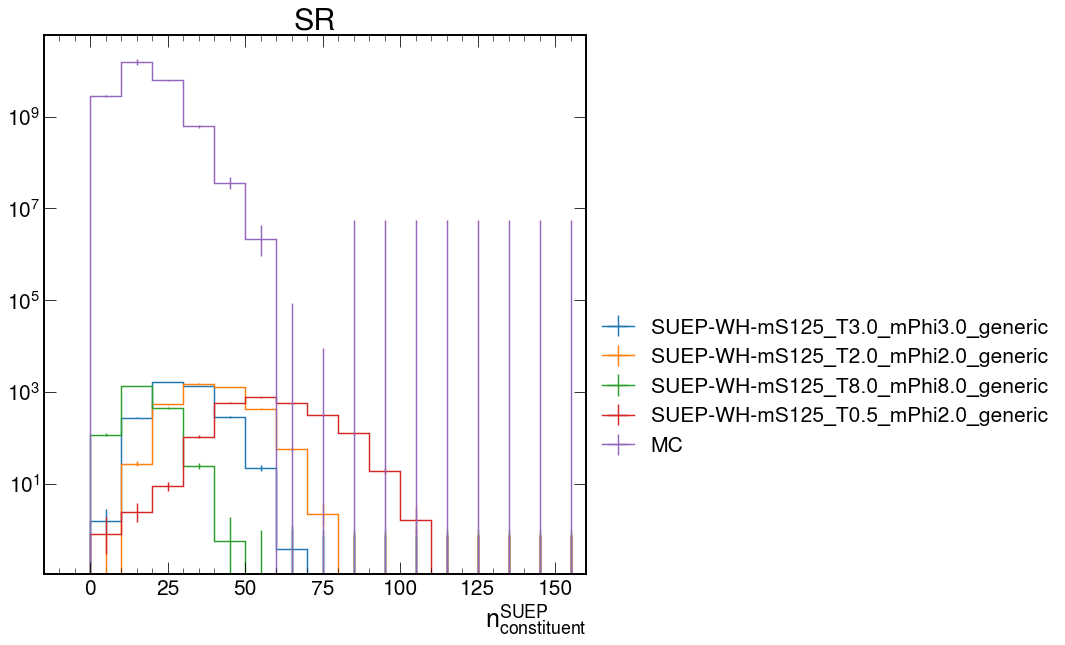

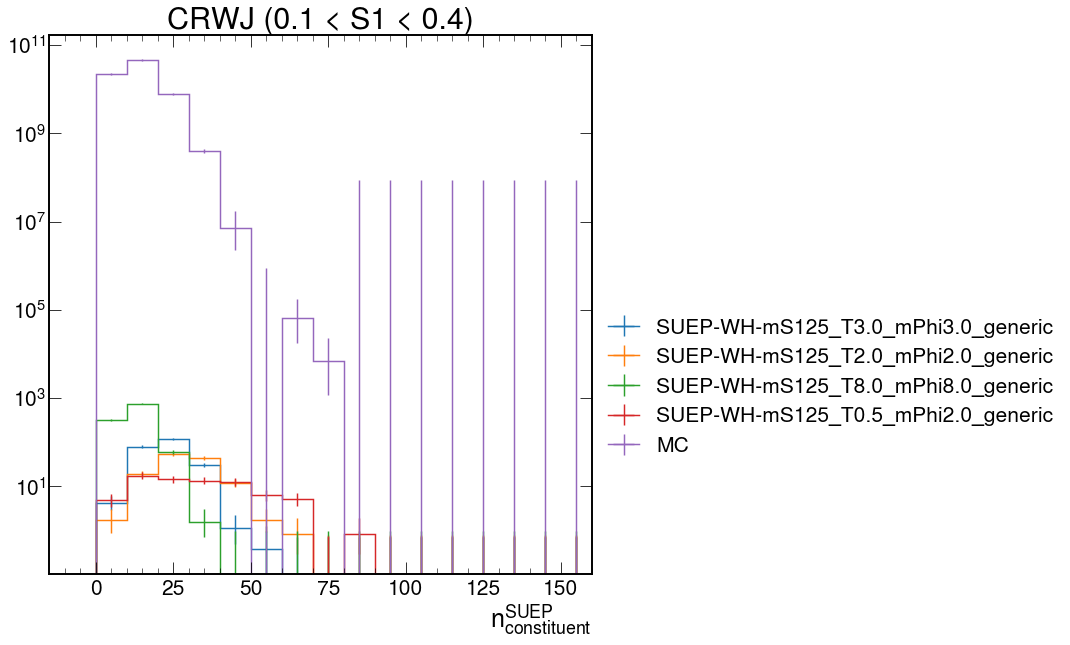

In [41]:
samples = ['SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T2.0_mPhi2.0_generic', 'SUEP-WH-mS125_T8.0_mPhi8.0_generic', 'SUEP-WH-mS125_T0.5_mPhi2.0_generic', 'MC']
histo = plots['SUEP-WH-mS125_T3.0_mPhi3.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo1 = plots['SUEP-WH-mS125_T2.0_mPhi2.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo2 = plots['SUEP-WH-mS125_T8.0_mPhi8.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo3 = plots['SUEP-WH-mS125_T0.5_mPhi2.0_generic']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']
histo4 = plots['MC']['3D_SUEP_S1_vs_ak4jet1_inSUEPcluster_pt_vs_SUEP_nconst_SR']


histos = [histo, histo1, histo2, histo3, histo4]
i=0
for gram in histos:
    #print(gram[:130j:sum, ::sum].value / gram[::sum, ::sum].value)
    hep.histplot(gram[0.5j::sum, :130j:sum, ::10j], label=samples[i])
    i += 1
    print()

plt.legend(loc=(1.01,0.2))
plt.xlim(right=160)
plt.yscale("log")
plt.title('SR')    
plt.show()
plt.close()    
i=0
for gram in histos:
    #print(gram[130j::sum, ::sum].value / gram[::sum, ::sum].value)
    hep.histplot(gram[0.1j:0.4j:sum, :130j:sum, ::10j], label=samples[i])
    i += 1
    print()

plt.legend(loc=(1.01,0.2))
plt.xlim(right=160)
plt.yscale("log")
plt.title('CRWJ (0.1 < S1 < 0.4)')
plt.show()




# General Plotting

## 1D Plots
Plot some of the 1D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_labels`: _list of str_, which plots to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>
`density`: _bool_, whether to plot histograms normalized to unity. <br>


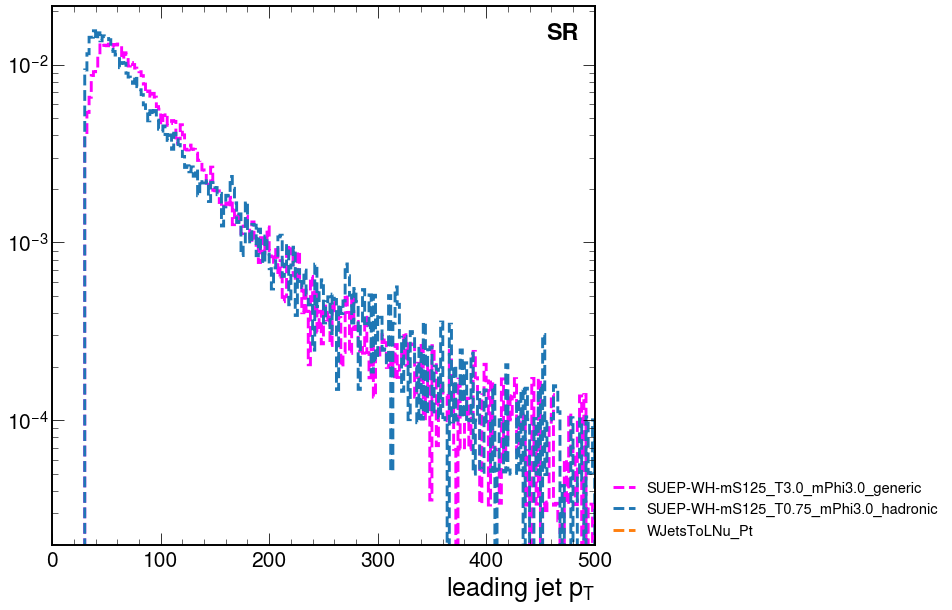

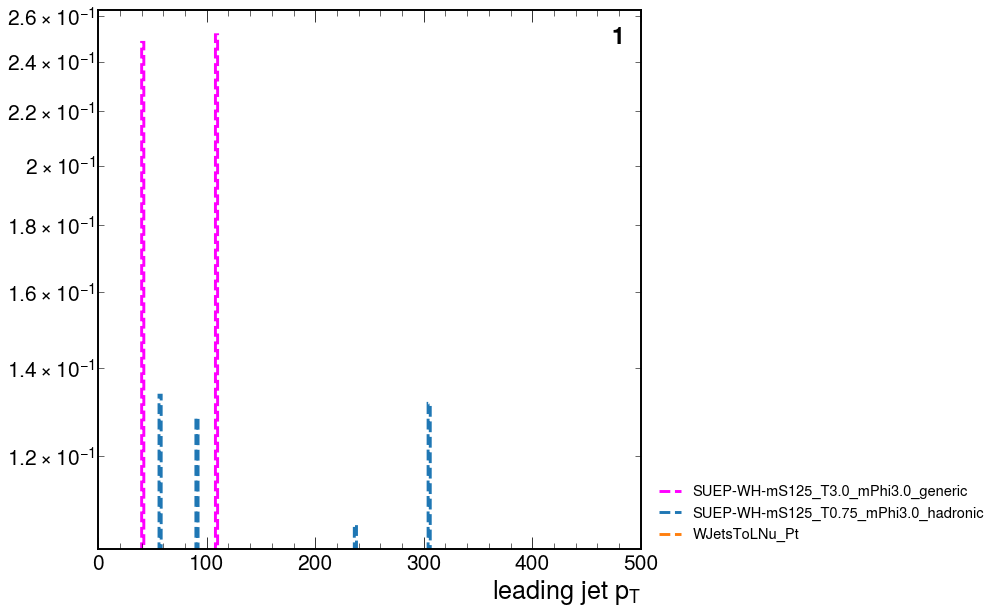

In [23]:
plot_labels = [
    'jet1_pt_SR',
    'jet1_pt_CRWJ_1'
]
bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]
samples = [
    'SUEP-WH-mS125_T3.0_mPhi3.0_generic',
    #'tt',
    'SUEP-WH-mS125_T0.75_mPhi3.0_hadronic',
    'WJetsToLNu_Pt',
    #'tt',
    #'DYJetsToLL_LHEFilterPtZ'
    
]
#labels_samples = [
#    #'SUEP-WH-M125.0_MD3.00_T3.00',
#    'tt',
#]
stacked_samples = []
new_bins = None #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
density = True
yerr = False
saveFigs = False

for plot_label in plot_labels:

    plt.figure()

    h_samples = []
    h_stacked = []
    for sample in samples: 
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked.append(h)
     
    if len(h_stacked) > 0: hep.histplot(h_stacked, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill')
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=samples, linestyle='dashed', linewidth=3, color=['fuchsia'])
        
    # tweak these by hand, as needed
    plt.legend(loc=(1.02,0), fontsize='xx-small')
    plt.yscale("log")
    #plt.ylim(1e-5, 1e-2)
    plt.xlim(0, 500)

    region = plot_label.split("_")[-1]
    plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        plt.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        plt.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    plt.show()


## 2D Plots

Plot some of the 2D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_label`: _str_, which plot to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>

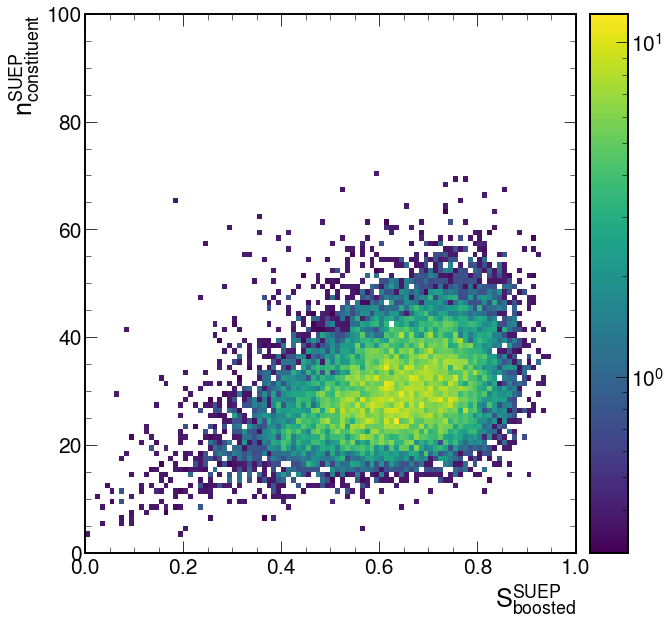

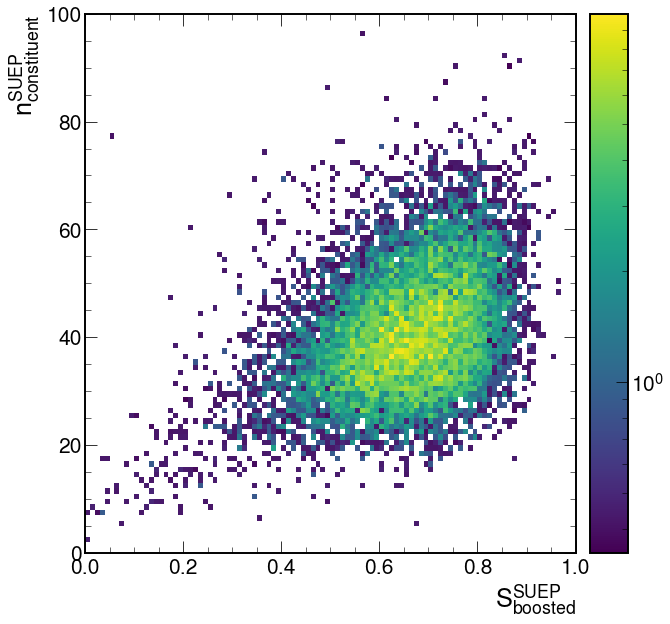

In [23]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_SR'
samples = ['SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T2.0_mPhi2.0_generic']

for sample in samples:
    
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue

    hep.hist2dplot(plots[sample][plot_label][:,:], 
               norm=matplotlib.colors.LogNorm(),
               label=sample) 
        
    plt.ylim(0,100)
    if saveFigs: plt.savefig(output_label + plot_label+ "_"+sample+file_ext)
    plt.show()

### 2D Hist Slices
Slice a 2D histogram and plot the slices; you can stack them and plot their densities.

(0.0, 100.0)

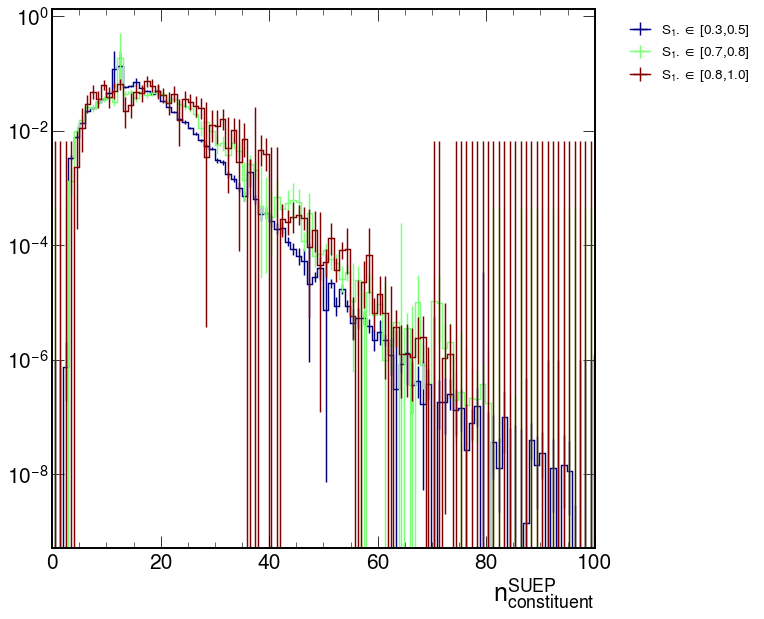

In [35]:
sample = 'MC'
slice_var = 'x'
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_SR'
stack = False
density = True
regions_list = [[0.3j, 0.5j],[0.7j,0.8j],[0.8j,1.0j]]


labels = [r"$S_1. \in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]
h = plots[sample][plot_label]
fig, ax = plot_sliced_hist2d(h, regions_list, density=density, stack=stack, slice_var=slice_var, labels=labels)
plt.xlim(0, 100)

## Ratios

### Compare Samples

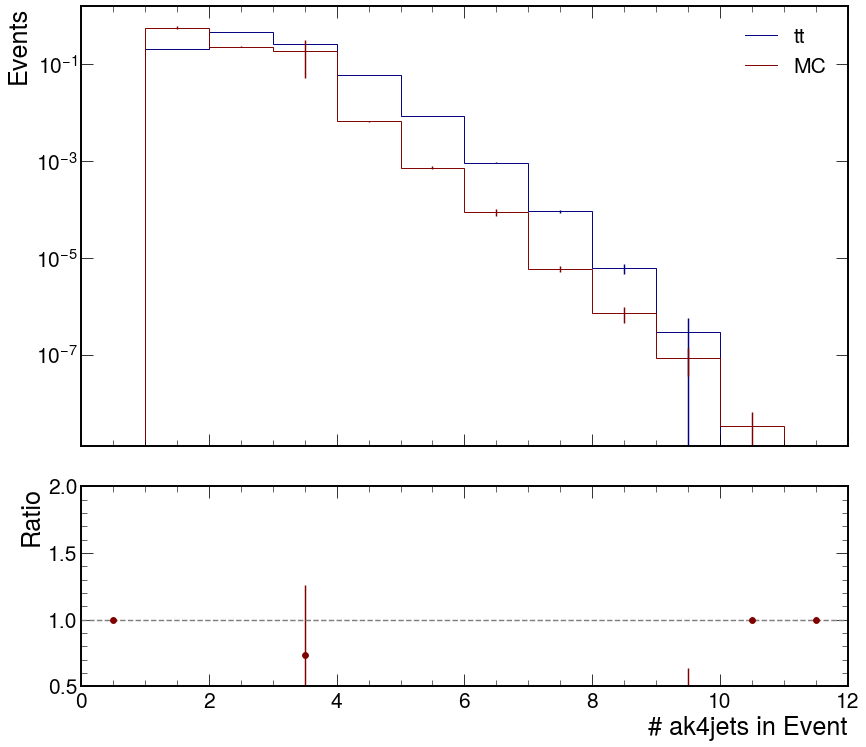

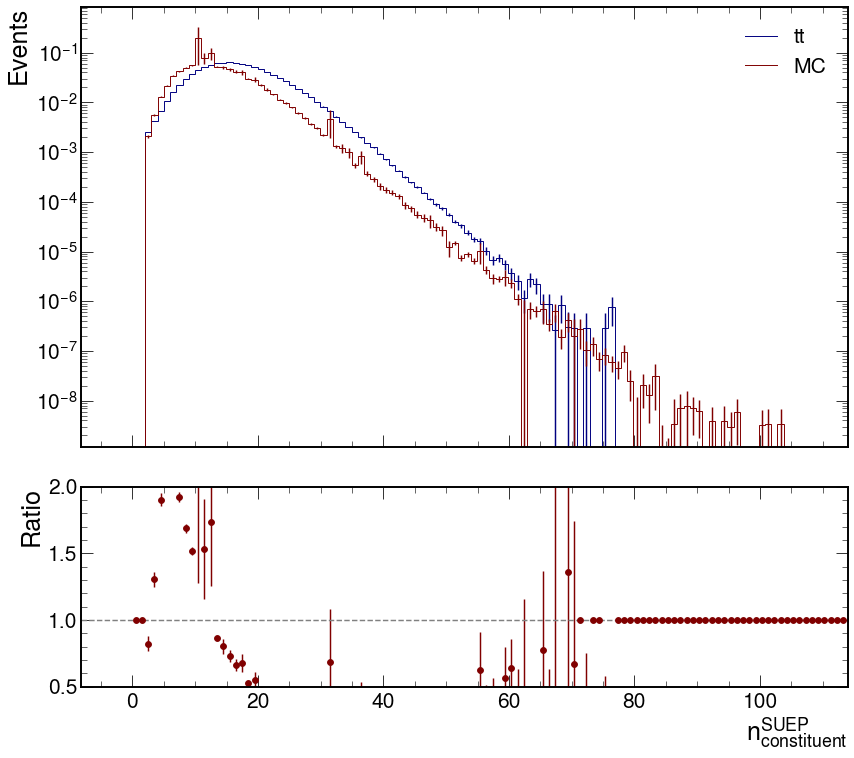

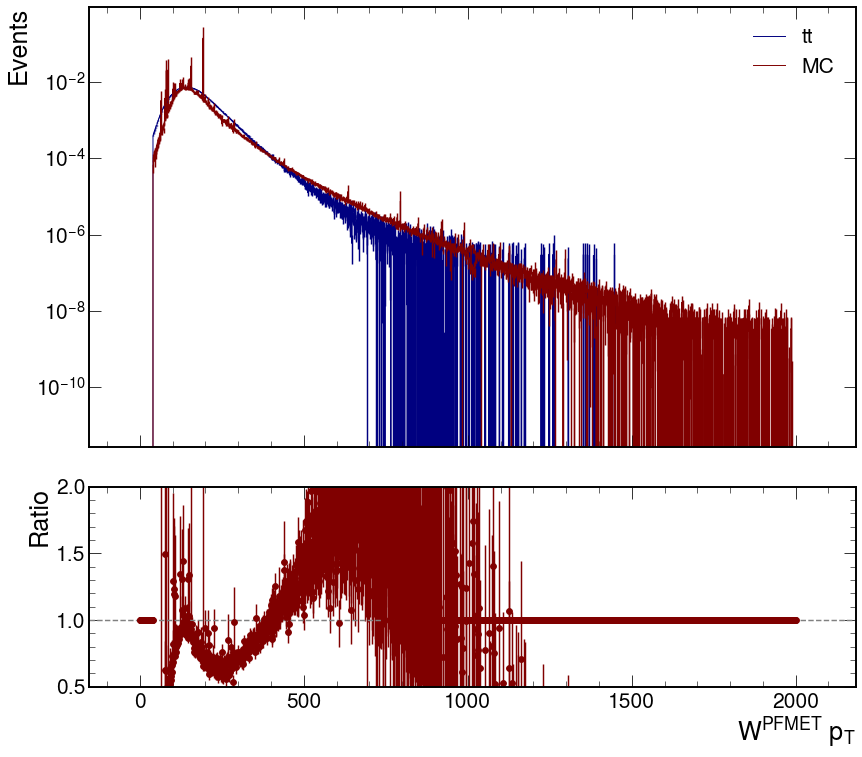

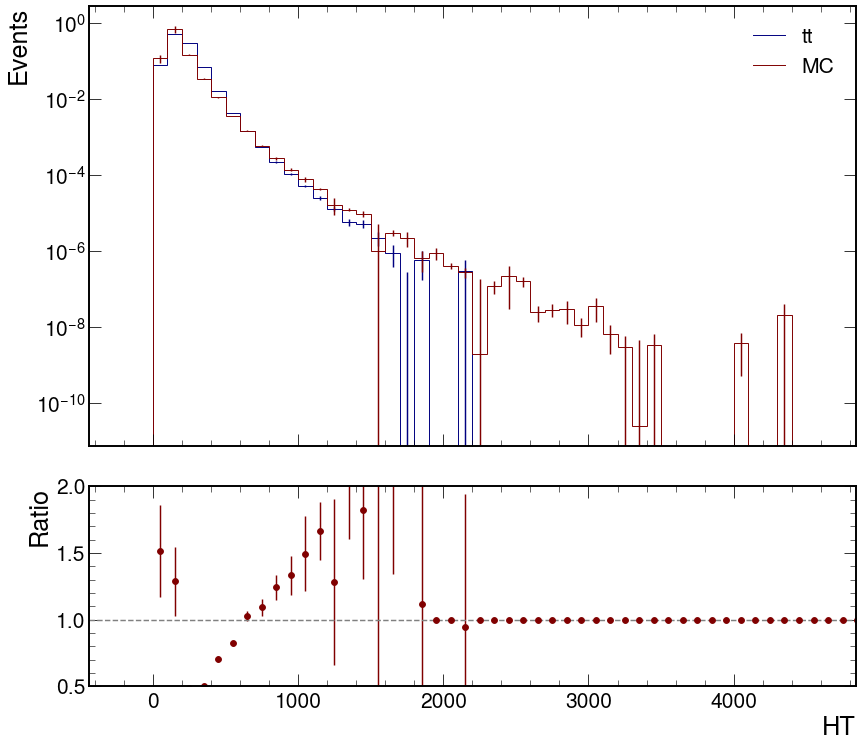

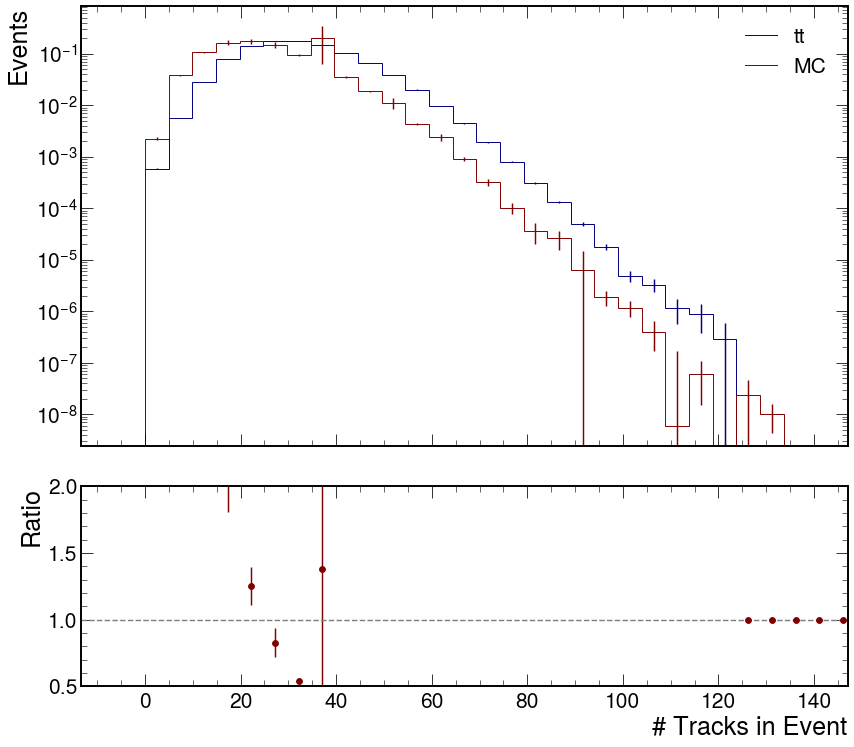

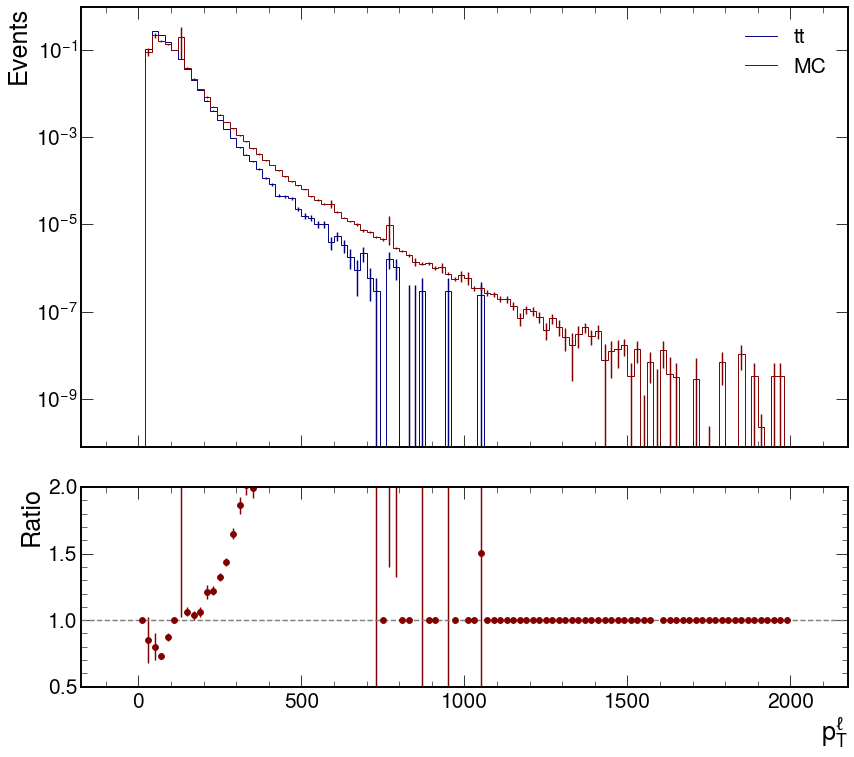

In [38]:
plot_labels = [
    'ngood_ak4jets_SR',
    'SUEP_nconst_SR',
    'W_pT_from_MET_SR',
    'ht_SR',
    'ntracks_SR',
    'lepton_pt_SR',
]
samples = [
    'tt',
    'MC',
]
density = True
saveFigs = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::1j] for sample in samples]

    fig, axs = plot_ratio(hlist, samples, density=density)
    fig.set_size_inches(15, 18)

    axs[0].legend()
    axs[0].legend(loc='best')
    axs[1].set_ylim(0.5,2.0)
    #axs[0].set_xlim(0,1000)
    
    if saveFigs: plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

### Compare Variables

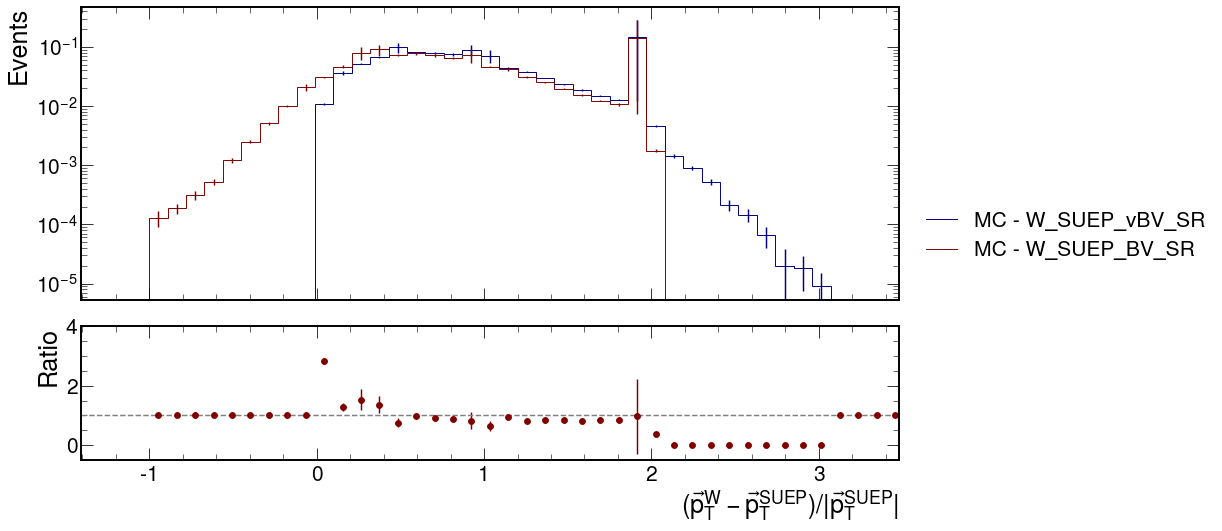

In [39]:
plot_labels = ['W_SUEP_vBV_SR', 'W_SUEP_BV_SR']
samples = ['MC']
density = False

hlist, labels = [], []
for plot_label in plot_labels:
    for sample in samples:
        hlist.append(plots[sample][plot_label])
        labels.append(sample + " - " + plot_label)

# our custom ratio calculates errors differently, more appropriate for plotting densities
fig, axs = plot_ratio(hlist, labels, density=True)
axs[0].legend(loc=(1.02,0.1))
axs[1].set_ylim(-0.5, 4.0)

if saveFigs: plt.savefig(output_label + "ratio_".join(plot_labels) + file_ext, bbox_inches='tight')
plt.show()

### Ratios of Slices
Slice a 2D histogram for both two samples or variables and plot ratio of each of the slices.

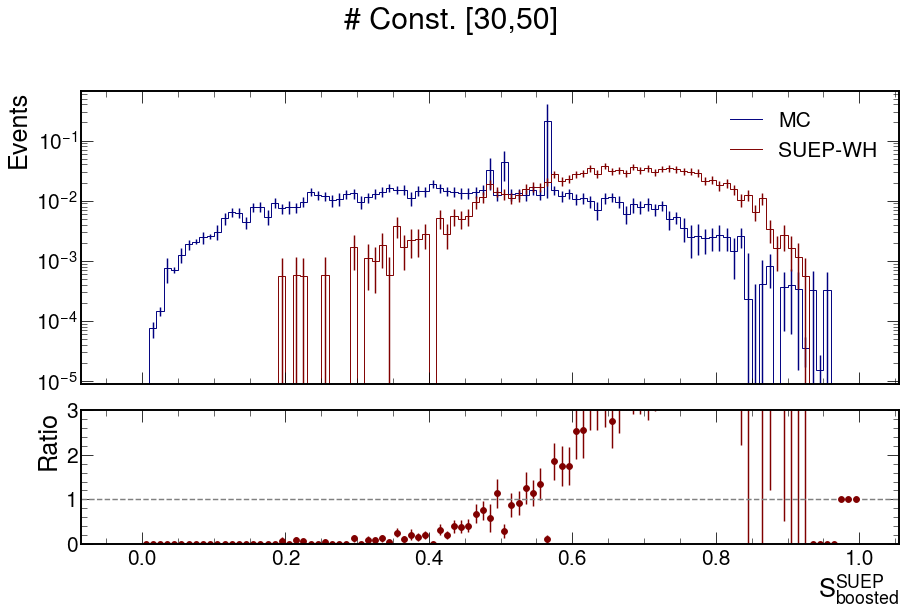

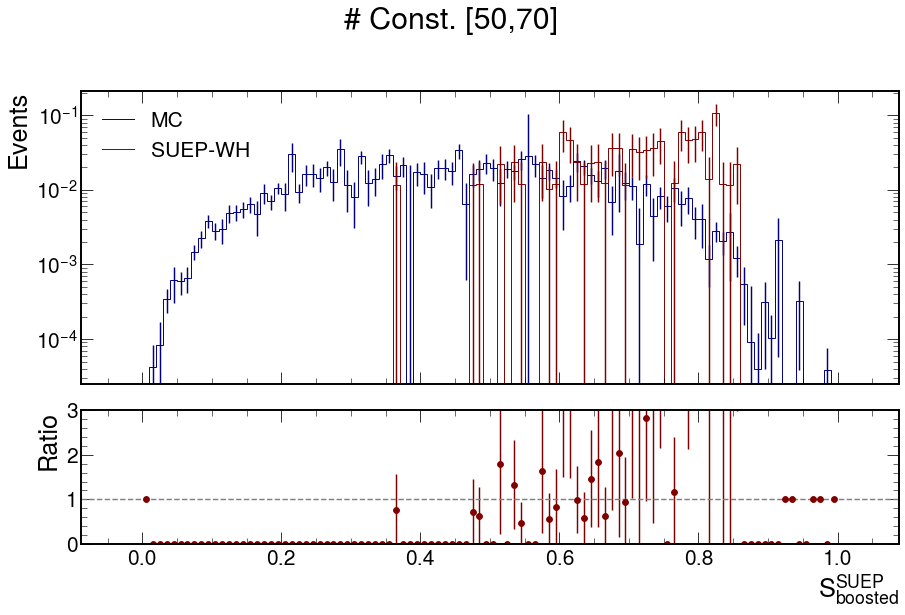

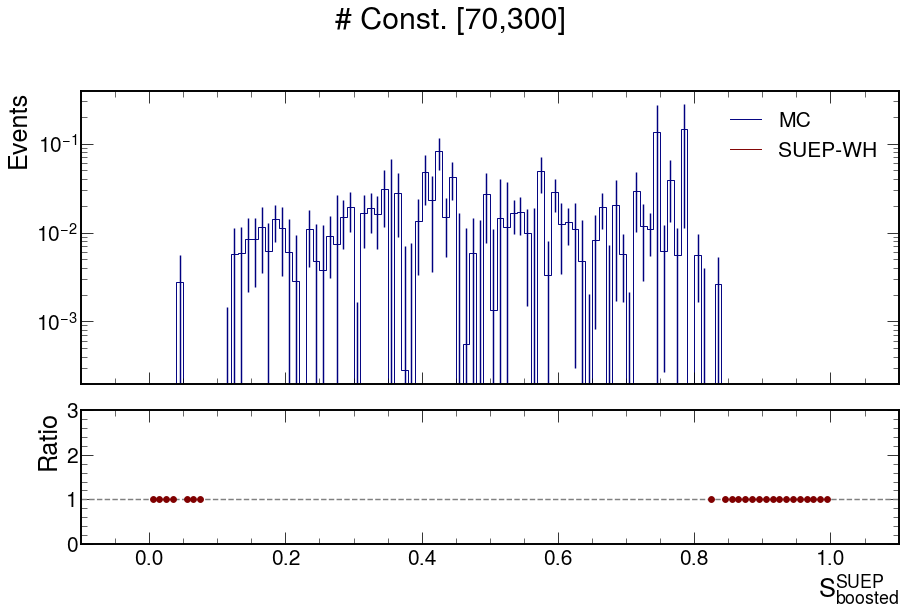

In [42]:
h1 = plots['MC']["2D_SUEP_S1_vs_SUEP_nconst_SR"]
h2 = plots['SUEP-WH-M125.0_MD3.00_T3.00']["2D_SUEP_S1_vs_SUEP_nconst_SR"]

regions_list = [[30j,50j], [50j,70j], [70j,300j]]
h1_slices = slice_hist2d(h1, regions_list, slice_var='y')
h2_slices = slice_hist2d(h2, regions_list, slice_var='y')

for h1_slice, h2_slice, regions in zip(h1_slices, h2_slices, regions_list):
    
    h1_slice = h1_slice[:]
    h2_slice = h2_slice[:]
    
    h1_slice = h1_slice/h1_slice.sum().value
    h2_slice = h2_slice/h2_slice.sum().value
  
    fig, axs = plot_ratio([h1_slice, h2_slice], ['MC', 'SUEP-WH'], density=True)
    axs[0].legend()
    axs[1].set_ylim(0, 3)
    
    fig.suptitle("# Const. [{},{}]".format(int(regions[0].imag), int(regions[1].imag)))
    plt.show()

## Automatic Plotting
Plot all histograms and save them automatically.<br>

### All 1D and 2D Plots

SUEP_nconst_SR, 
SUEP_S1_SR, 
ht_SR, 
ht_JEC_SR, 
ht_JEC_JER_up_SR, 
ht_JEC_JER_down_SR, 
ht_JEC_JES_up_SR, 
ht_JEC_JES_down_SR, 
ntracks_SR, 
ngood_fastjets_SR, 
PV_npvs_SR, 
Pileup_nTrueInt_SR, 
ngood_ak4jets_SR, 
ngood_ak4jets_noLepIso_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
2D_SUEP_S1_vs_SUEP_nconst_SR, 
2D_SUEP_S1_vs_ntracks_SR, 
SUEP_genMass_SR, 
SUEP_pt_SR, 
SUEP_delta_pt_genPt_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_pt_avg_SR, 
SUEP_pt_avg_b_SR, 
SUEP_eta_SR, 
SUEP_phi_SR, 
SUEP_mass_SR, 
SUEP_delta_mass_genMass_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_ISR_deltaPhi_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram em

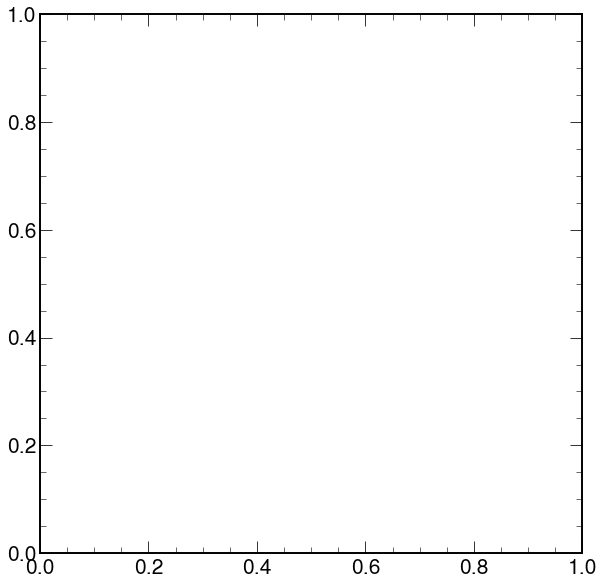

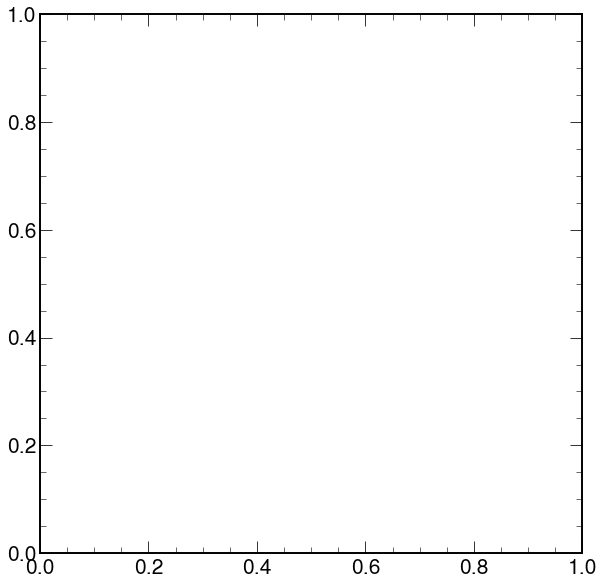

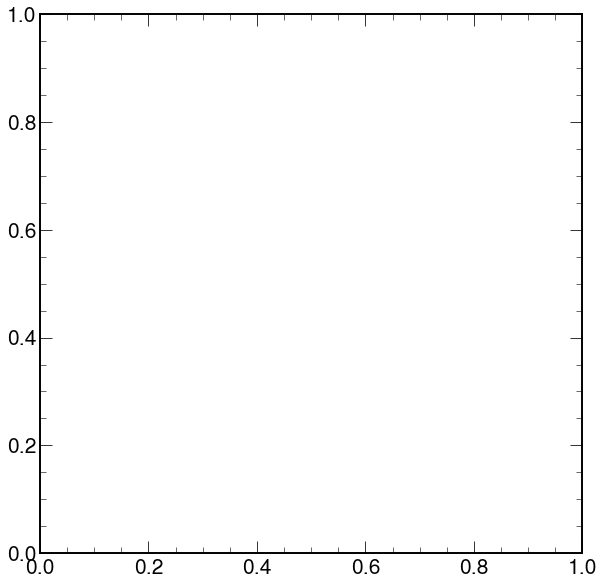

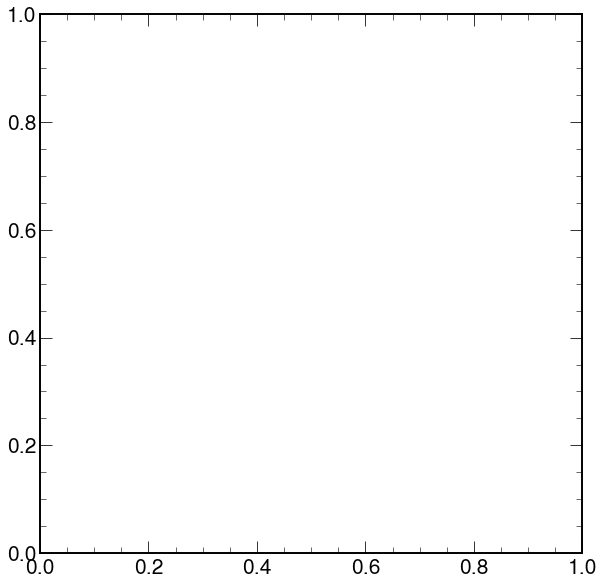

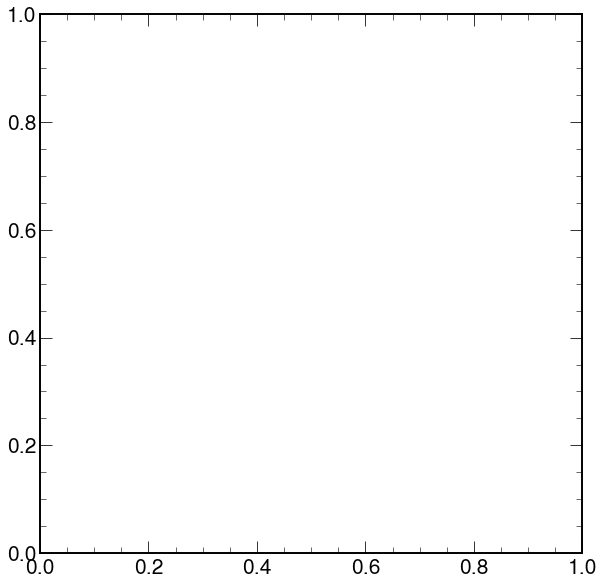

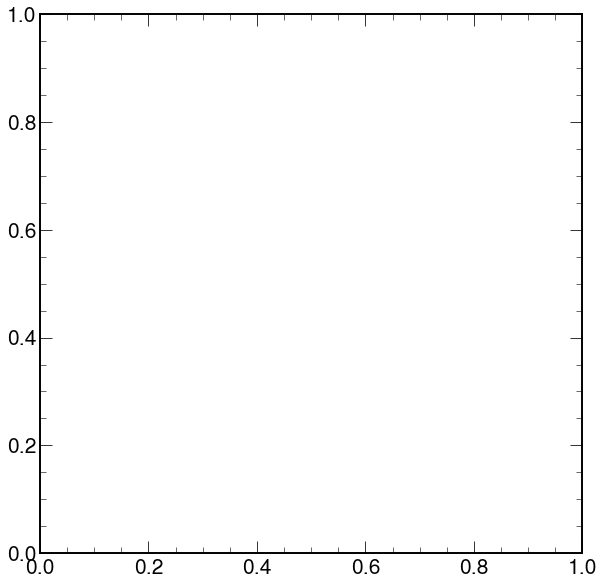

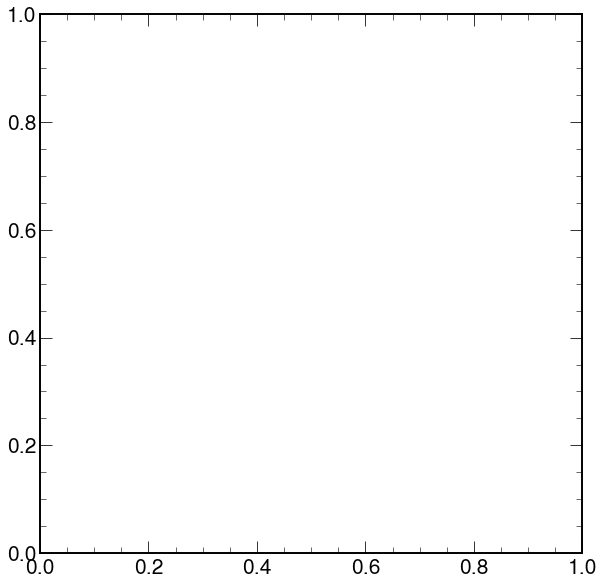

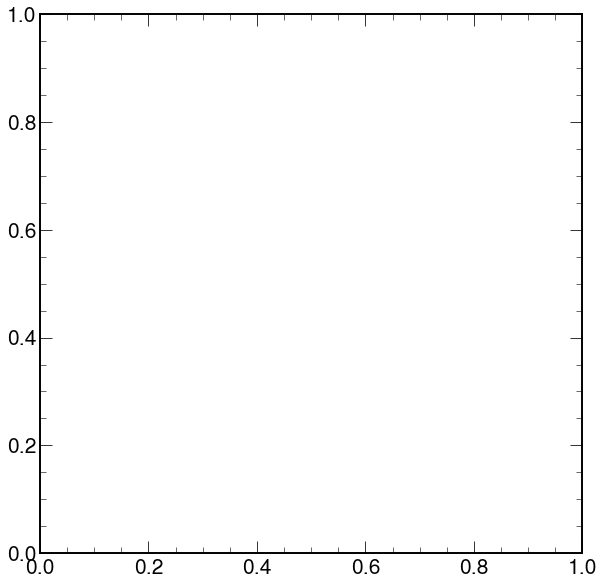

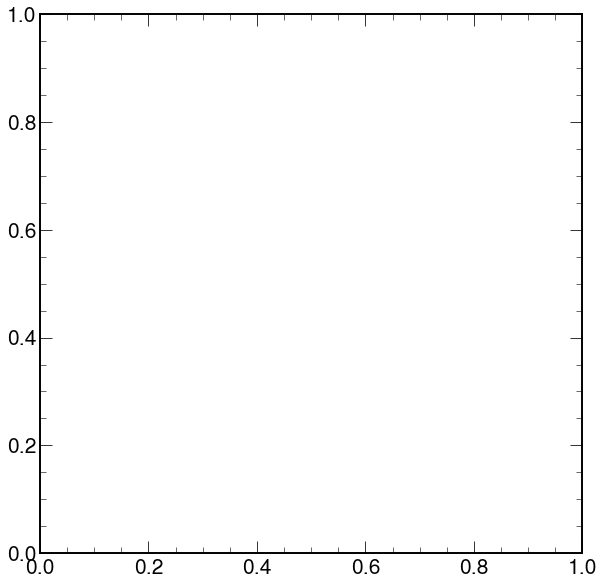

In [171]:
outdir = 'allplots/'
unstacked_samples = [
    'SUEP-WH-M125.0_MD3.00_T0.75',
    'ttH-MS125.0_MD3.0_T0.75_hadronic',
    'tt',
]
stacked_samples = []
density = True
yerr = False

all_samples = unstacked_samples + stacked_samples
plot_labels = [k for k in list(plots[all_samples[0]].keys())]
if not os.path.isdir(output_label+outdir): os.system("mkdir " + str(output_label+outdir))

for plot_label in plot_labels:
    print(plot_label, end=", ")

    fig = plt.figure()
    ax = fig.add_subplot()
    
    # 2D plots
    if '2D' in plot_label:    
        for sample in stacked_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue

            # plot each sample separately
            h = plots[sample][plot_label]
            hep.hist2dplot(h, 
                       norm=matplotlib.colors.LogNorm(),
                       label=sample,
                       ax=ax) 
            fig.savefig(output_label + outdir + plot_label+ "_"+sample+file_ext, bbox_inches='tight')
            plt.close()
        
    # 1D variables
    else:

        # plot all samples in same histogram
        stacked_hists, stacked_histlabels = [], []
        unstacked_hists, unstacked_histlabels = [], []
        for sample in all_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue
        
        # plot everything
        for sample in all_samples:
            h = plots[sample][plot_label]
            if sample in stacked_samples: 
                stacked_hists.append(h)
                stacked_histlabels.append(sample)
            elif sample in unstacked_samples:
                unstacked_hists.append(h)
                unstacked_histlabels.append(sample)

        region = plot_label.split("_")[-1]
        ax.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

        if len(stacked_hists) > 0: hep.histplot(stacked_hists, label=stacked_histlabels, yerr=yerr, density=density, stack=True, histtype='fill', ax=ax)
        if len(unstacked_hists) > 0: hep.histplot(unstacked_hists, label=unstacked_histlabels, yerr=yerr, density=density, stack=False, histtype='step', ax=ax)
        if len(stacked_hists) > 0 or len(unstacked_hists) > 0:
            ax.legend(loc=(1.02,0), fontsize='xx-small')
            ax.set_yscale("log")
            #ax.set_ylim(1e-5,1e0)
            fig.savefig(output_label + 'allplots/' + plot_label + ".pdf", bbox_inches='tight')
            fig.savefig(output_label + 'allplots/' + plot_label + ".png", bbox_inches='tight')
        plt.close()

    print()
print("All done")

### All Ratios: 1D Plots
For each 1D histogram, make a ratio plot between two samples.

In [ ]:
plot_labels = list(plots['QCD_HT_2018'].keys())
density = False
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if '2D' in plot_label: continue

        print(plot_label, end=", ")
        h1 = plots[l1][plot_label]
        h2 = plots[l2][plot_label]
        
        if h1.sum().value == 0 or h2.sum().value == 0: continue
        
        if density: 
            h1 = h1/h1.sum().value
            h2 = h2/h2.sum().value
            fig, axs, _ = plot_ratio(h1, h2, label1=l1, label2=l2)
            axs[0].legend()
        else:
            fig = plt.figure(figsize=(10, 8))
            _ = h1.plot_ratio(h2,
                             rp_num_label=l1,
                             rp_denom_label=l2)
            fig.axes[0].set_yscale("log")
            fig.axes[1].set_ylim(0.4,1.6)
            
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

    print("All done")

### All Ratios: Combined Regions

In [ ]:
density = True

plot_labels = list(plots['QCD_HT_2018'].keys())
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"_combinedRegions/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if "A_" not in plot_label: continue
        print(plot_label, end=", ")
        
        h1 = plots[l1][plot_label.replace("A_", "")]
        h2 = plots[l2][plot_label.replace("A_", "")]
        if h1.sum().value == 0 or h2.sum().value == 0:
            print("Empty", end=", ")
            continue
            
        # x or y define order of regions
        x = 'ABCDEFGH'
        y = 'ADGBEHCF'
        _ = plot_ratio_regions(plots, plot_label, l1, l2, x, density=density)
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()